# PROJECT NAME: Youth vs Adult Health Analysis System (Cardaic Arrest Prediction)

# DATA UNDERSTANDING
# DATA PREPROCESSING
# FEATURE ENGINEERING
# MODEL SELECTION
# MODEL PREDICTION (FINAL PHASE)

# GROUP 7

# Midhat Ayub — 23FA-055-SE
# Syed Mujahid Shah — 23FA-006-SE
# Bilal Haider — 23FA-060-SE
E`
060-SE`

E`
060-SE`

 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [3]:
import pandas as pd
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

In [4]:
print (heart_data)

        Age  Gender Region   BMI Smoker Diabetes Hypertension  \
0        74  Female  Urban  32.1    Yes      Yes          Yes   
1        68    Male  Urban  38.3    Yes      Yes           No   
2        50    Male  Urban  31.3    Yes      Yes          Yes   
3        29    Male  Urban  34.0     No       No           No   
4        62    Male  Urban  25.1     No       No           No   
...     ...     ...    ...   ...    ...      ...          ...   
399989   79    Male  Rural  28.7     No      Yes           No   
399990   41  Female  Urban  23.6    Yes      Yes           No   
399991   21  Female  Urban  23.3     No      Yes          Yes   
399992   69  Female  Urban  24.0    Yes       No          Yes   
399993   18    Male  Urban  37.9    Yes       No          Yes   

        Cholesterol_Level Physical_Activity       Diet  ... Blood_Pressure  \
0                   111.5          Moderate    Healthy  ...            162   
1                   276.3              High    Healthy  ...    

In [5]:
heart_data.head()

,Age,Gender,Region,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,...,Blood_Pressure,Heart_Rate,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Recovery_Status,Medication,Follow_Up
0,74,Female,Urban,32.1,Yes,Yes,Yes,111.5,Moderate,Healthy,...,162,52,No,Abnormal,102.0,No,Yes,Ongoing,Yes,Irregular
1,68,Male,Urban,38.3,Yes,Yes,No,276.3,High,Healthy,...,150,97,No,Normal,186.9,Yes,No,Deceased,Yes,Regular
2,50,Male,Urban,31.3,Yes,Yes,Yes,134.9,High,Unhealthy,...,98,67,Yes,Normal,71.4,No,Yes,Ongoing,No,NaN
3,29,Male,Urban,34.0,No,No,No,224.8,High,Healthy,...,99,87,No,Normal,191.0,No,No,Recovered,Yes,Regular
4,62,Male,Urban,25.1,No,No,No,128.0,Moderate,Healthy,...,128,89,No,Abnormal,184.1,Yes,No,Recovered,No,Irregular


**Dataset Description:**

- Each row represents data for an individual patient.
- Each column (feature) in the dataset corresponds to a specific symptom, lifestyle factor, or clinical measurement that may contribute to understanding cardiovascular health outcomes, including heart attacks.

**Feature Descriptions:**

- **Age**: Age of the patient (in years)
- **Gender**: Gender of the patient (Male or Female)
- **Region**: Geographical location of the patient (Urban or Rural)
- **BMI**: Body Mass Index, a measure of body fat based on height and weight
- **Smoker**: Smoking status (Yes = currently smokes, No = does not smoke)
- **Diabetes**: Indicates whether the patient has diabetes (Yes or No)
- **Hypertension**: Indicates if the patient has high blood pressure (Yes or No)
- **Cholesterol_Level**: Serum cholesterol level (mg/dL)
- **Physical_Activity**: Level of physical activity (Low, Moderate, or High)
- **Diet**: Diet type (Healthy or Unhealthy)
- **Family_History**: Indicates family history of heart disease (Yes or No)
- **Stress_Level**: Reported stress level (Low, Moderate, or High)
- **Alcohol_Consumption**: Alcohol intake (Yes or No)
- **Drug_Use**: Use of recreational drugs (Yes or No)
- **Sleep_Hours**: Average number of sleep hours per day
- **Blood_Pressure**: Blood pressure level (mm Hg)
- **Heart_Rate**: Heart rate (beats per minute)
- **Chest_Pain**: Presence of chest pain (Yes or No)
- **ECG_Results**: Results from electrocardiographic tests (Normal or Abnormal)
- **Blood_Sugar**: Measured blood sugar level (mg/dL)
- **Angina**: Whether the patient experiences angina (chest pain due to reduced blood flow) (Yes or No)
- **Cardiac_Arrest**: Indicates if the patient has experienced cardiac arrest (Yes or No)
- **Recovery_Status**: Current health status after a cardiac event (Ongoing, Recovered, or Deceased)
- **Medication**: Whether the patient is taking heart-related medication (Yes or No)
- **Follow_Up**: Regularity of follow-up visits (Regular, Irregular, or None)


In [7]:
heart_data.tail()

,Age,Gender,Region,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,...,Blood_Pressure,Heart_Rate,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Recovery_Status,Medication,Follow_Up
399989,79,Male,Rural,28.7,No,Yes,No,296.3,Low,Healthy,...,91,59,Yes,Normal,141.3,Yes,No,Ongoing,No,Regular
399990,41,Female,Urban,23.6,Yes,Yes,No,162.5,High,Healthy,...,165,53,Yes,Abnormal,138.1,No,Yes,Deceased,Yes,Irregular
399991,21,Female,Urban,23.3,No,Yes,Yes,181.7,High,Unhealthy,...,138,83,No,Abnormal,101.9,No,No,Deceased,Yes,Irregular
399992,69,Female,Urban,24.0,Yes,No,Yes,274.6,High,Healthy,...,174,116,Yes,Normal,99.0,Yes,Yes,Ongoing,Yes,NaN
399993,18,Male,Urban,37.9,Yes,No,Yes,241.5,Moderate,Healthy,...,110,60,Yes,Abnormal,112.4,Yes,Yes,Ongoing,No,NaN


In [8]:
heart_data.columns

Index(['Age', 'Gender', 'Region', 'BMI', 'Smoker', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Physical_Activity', 'Diet', 'Family_History',
       'Stress_Level', 'Alcohol_Consumption', 'Drug_Use', 'Sleep_Hours',
       'Blood_Pressure', 'Heart_Rate', 'Chest_Pain', 'ECG_Results',
       'Blood_Sugar', 'Angina', 'Cardiac_Arrest', 'Recovery_Status',
       'Medication', 'Follow_Up'],
      dtype='object')

In [9]:
heart_data.shape

(399994, 25)

In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399994 entries, 0 to 399993
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  399994 non-null  int64  
 1   Gender               399994 non-null  object 
 2   Region               399994 non-null  object 
 3   BMI                  399994 non-null  float64
 4   Smoker               399994 non-null  object 
 5   Diabetes             399994 non-null  object 
 6   Hypertension         399994 non-null  object 
 7   Cholesterol_Level    399994 non-null  float64
 8   Physical_Activity    399994 non-null  object 
 9   Diet                 399994 non-null  object 
 10  Family_History       399994 non-null  object 
 11  Stress_Level         399994 non-null  object 
 12  Alcohol_Consumption  399994 non-null  object 
 13  Drug_Use             399994 non-null  object 
 14  Sleep_Hours          399994 non-null  int64  
 15  Blood_Pressure   

In [11]:
heart_data.describe()

,Age,BMI,Cholesterol_Level,Sleep_Hours,Blood_Pressure,Heart_Rate,Blood_Sugar
count,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000
mean,47.481772,27.532449,200.142307,6.498307,134.936457,85.022293,135.088672
std,19.070708,7.205656,57.785064,2.296341,26.228284,20.514181,37.468079
min,15.000000,15.000000,100.000000,3.000000,90.000000,50.000000,70.000000
25%,31.000000,21.300000,150.000000,4.000000,112.000000,67.000000,102.700000
50%,47.000000,27.500000,200.200000,6.000000,135.000000,85.000000,135.100000
75%,64.000000,33.800000,250.300000,9.000000,158.000000,103.000000,167.500000
max,80.000000,40.000000,300.000000,10.000000,180.000000,120.000000,200.000000


In [12]:
heart_data['Cardiac_Arrest'].value_counts()

Cardiac_Arrest
Yes    200093
No     199901
Name: count, dtype: int64

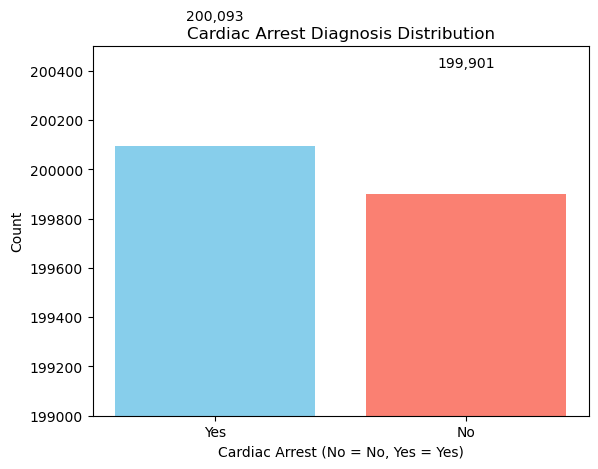

In [13]:
import matplotlib.pyplot as plt

counts = heart_data['Cardiac_Arrest'].value_counts()
bars = plt.bar(counts.index, counts.values, color=['skyblue', 'salmon'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 500, f'{yval:,}', ha='center', va='bottom')

# Set axis labels and titl
plt.xlabel('Cardiac Arrest (No = No, Yes = Yes)')
plt.ylabel('Count')
plt.title('Cardiac Arrest Diagnosis Distribution')

plt.ylim([199000, 200500])

plt.show()


**Cardiac Arrest Diagnosis Distribution - Explanation**

- The bar chart illustrates the distribution of cardiac arrest diagnoses in the dataset.
- The x-axis represents whether a cardiac arrest was diagnosed (**Yes** or **No**).
- The y-axis shows the corresponding **count of cases** for each category.
- The **sky blue bar** corresponds to the **Yes** category, indicating **200,093 cases** where cardiac arrest was diagnosed.
- The **salmon-colored bar** represents the **No** category, with **199,901 cases** where cardiac arrest was not diagnosed.


In [15]:
import seaborn as sns

numeric_data = heart_data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

print(corr_matrix.to_string())


                        Age       BMI  Cholesterol_Level  Sleep_Hours  Blood_Pressure  Heart_Rate  Blood_Sugar
Age                1.000000  0.003512           0.000455     0.002022       -0.001951   -0.000997    -0.002201
BMI                0.003512  1.000000           0.003156     0.004151       -0.003147   -0.000047    -0.000316
Cholesterol_Level  0.000455  0.003156           1.000000     0.004954        0.000738    0.002343     0.000786
Sleep_Hours        0.002022  0.004151           0.004954     1.000000       -0.002396   -0.004677     0.001060
Blood_Pressure    -0.001951 -0.003147           0.000738    -0.002396        1.000000    0.000896    -0.000442
Heart_Rate        -0.000997 -0.000047           0.002343    -0.004677        0.000896    1.000000     0.000074
Blood_Sugar       -0.002201 -0.000316           0.000786     0.001060       -0.000442    0.000074     1.000000


**Correlation Matrix Summary:**

All variables show very weak correlations (near 0), whether positive or negative. This suggests no strong linear relationships between age, BMI, cholesterol, sleep hours, blood pressure, heart rate, and blood sugar in the dataset.


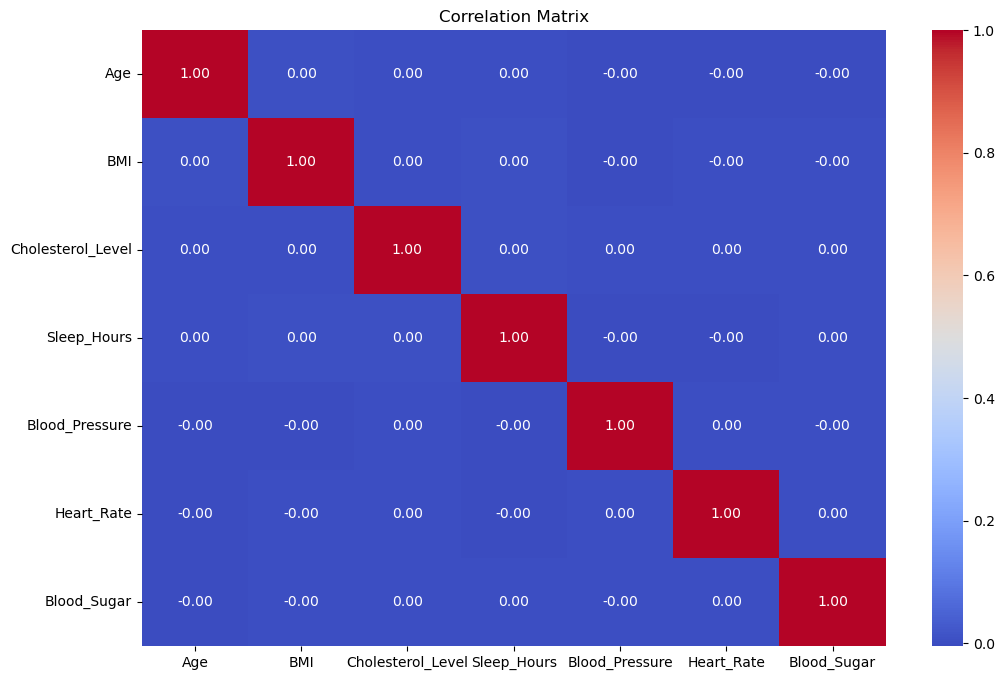

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = heart_data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [18]:
# Check for missing values in each column
missing_values = heart_data.isnull().sum()

# Display the result
print("Missing values in each column:\n")
print(missing_values)


Missing values in each column:

Age                         0
Gender                      0
Region                      0
BMI                         0
Smoker                      0
Diabetes                    0
Hypertension                0
Cholesterol_Level           0
Physical_Activity           0
Diet                        0
Family_History              0
Stress_Level                0
Alcohol_Consumption         0
Drug_Use                    0
Sleep_Hours                 0
Blood_Pressure              0
Heart_Rate                  0
Chest_Pain                  0
ECG_Results                 0
Blood_Sugar                 0
Angina                      0
Cardiac_Arrest              0
Recovery_Status             0
Medication                  0
Follow_Up              133631
dtype: int64


In [19]:
heart_data.groupby('Cardiac_Arrest').mean(numeric_only=True)

,Age,BMI,Cholesterol_Level,Sleep_Hours,Blood_Pressure,Heart_Rate,Blood_Sugar
Cardiac_Arrest,,,,,,,
No,47.549092,27.536936,200.141335,6.495230,134.961981,85.068174,135.030737
Yes,47.414517,27.527966,200.143277,6.501382,134.910956,84.976456,135.146551


In [20]:
heart_data['Gender'].value_counts()

Gender
Female    200265
Male      199729
Name: count, dtype: int64

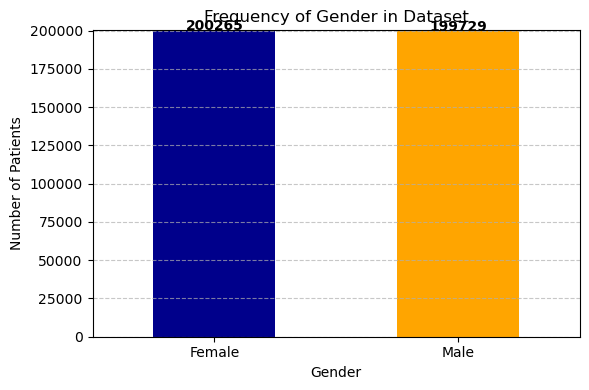

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


gender_counts = heart_data['Gender'].value_counts()


plt.figure(figsize=(6, 4))
bars = gender_counts.plot(kind='bar', color=['darkblue', 'orange'])

for index, value in enumerate(gender_counts):
    plt.text(index, value + 0.1, str(value), ha='center', fontweight='bold')

plt.title('Frequency of Gender in Dataset')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.ylim(0, max(gender_counts) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

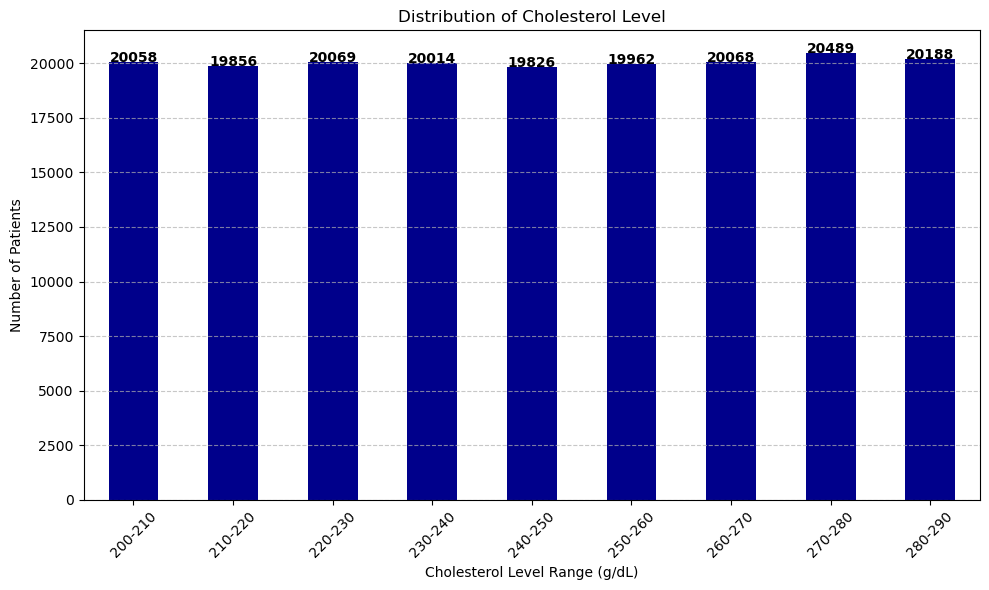

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

bins = range(200, 300, 10)  
labels = [f'{i}-{i+10}' for i in bins[:-1]]  

heart_data['Cholesterol_Level_Binned'] = pd.cut(heart_data['Cholesterol_Level'], bins=bins, labels=labels, right=False)

cholesterol_counts_binned = heart_data['Cholesterol_Level_Binned'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = cholesterol_counts_binned.plot(kind='bar', color='darkblue')

for index, value in enumerate(cholesterol_counts_binned):
    plt.text(index, value + 0.1, str(value), ha='center', fontweight='bold')

plt.title('Distribution of Cholesterol Level')
plt.xlabel('Cholesterol Level Range (g/dL)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('Cholesterol_Level_Binned_bar_chart.png')
plt.show()

Columns in dataset: Index(['Age', 'Gender', 'Region', 'BMI', 'Smoker', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Physical_Activity', 'Diet', 'Family_History',
       'Stress_Level', 'Alcohol_Consumption', 'Drug_Use', 'Sleep_Hours',
       'Blood_Pressure', 'Heart_Rate', 'Chest_Pain', 'ECG_Results',
       'Blood_Sugar', 'Angina', 'Cardiac_Arrest', 'Recovery_Status',
       'Medication', 'Follow_Up', 'Cholesterol_Level_Binned'],
      dtype='object')
   Age  Gender Region   BMI Smoker Diabetes Hypertension  Cholesterol_Level  \
0   74  Female  Urban  32.1    Yes      Yes          Yes              111.5   
1   68    Male  Urban  38.3    Yes      Yes           No              276.3   
2   50    Male  Urban  31.3    Yes      Yes          Yes              134.9   
3   29    Male  Urban  34.0     No       No           No              224.8   
4   62    Male  Urban  25.1     No       No           No              128.0   

  Physical_Activity       Diet  ... Heart_Rate Chest_Pai

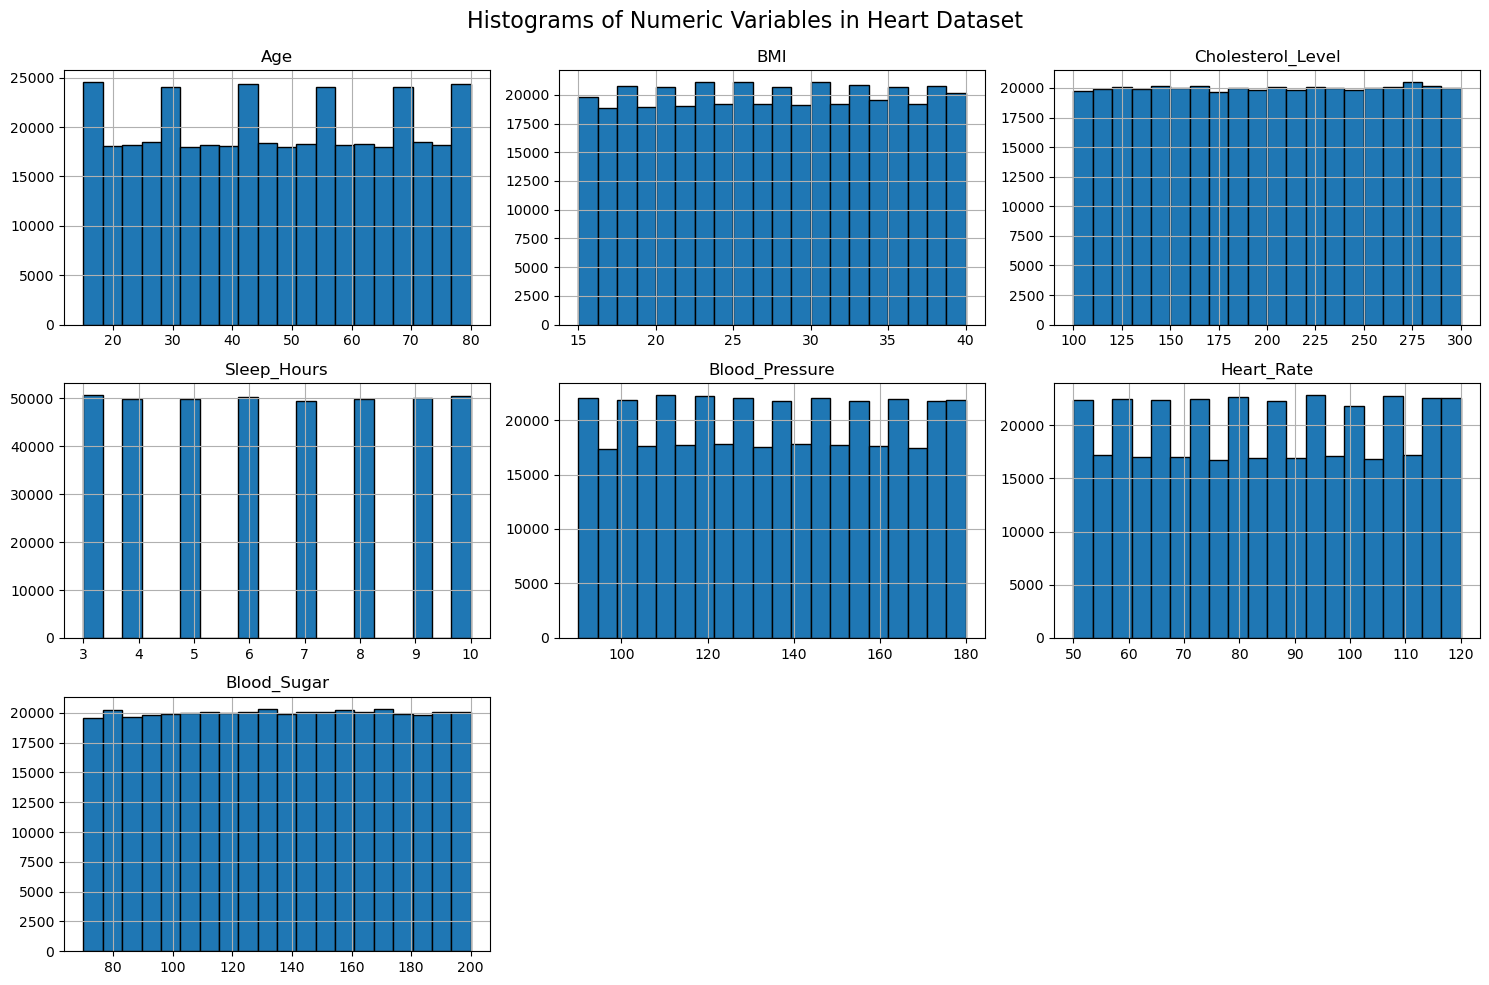

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

print("Columns in dataset:", heart_data.columns)
print(heart_data.head())

numeric_cols = heart_data.select_dtypes(include=['number']).columns

heart_data[numeric_cols].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Variables in Heart Dataset', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for title

plt.savefig('heart_numeric_histograms.png')


plt.show()

In [24]:
missing_values = heart_data.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)


Missing values in each column:

Age                              0
Gender                           0
Region                           0
BMI                              0
Smoker                           0
Diabetes                         0
Hypertension                     0
Cholesterol_Level                0
Physical_Activity                0
Diet                             0
Family_History                   0
Stress_Level                     0
Alcohol_Consumption              0
Drug_Use                         0
Sleep_Hours                      0
Blood_Pressure                   0
Heart_Rate                       0
Chest_Pain                       0
ECG_Results                      0
Blood_Sugar                      0
Angina                           0
Cardiac_Arrest                   0
Recovery_Status                  0
Medication                       0
Follow_Up                   133631
Cholesterol_Level_Binned    219464
dtype: int64


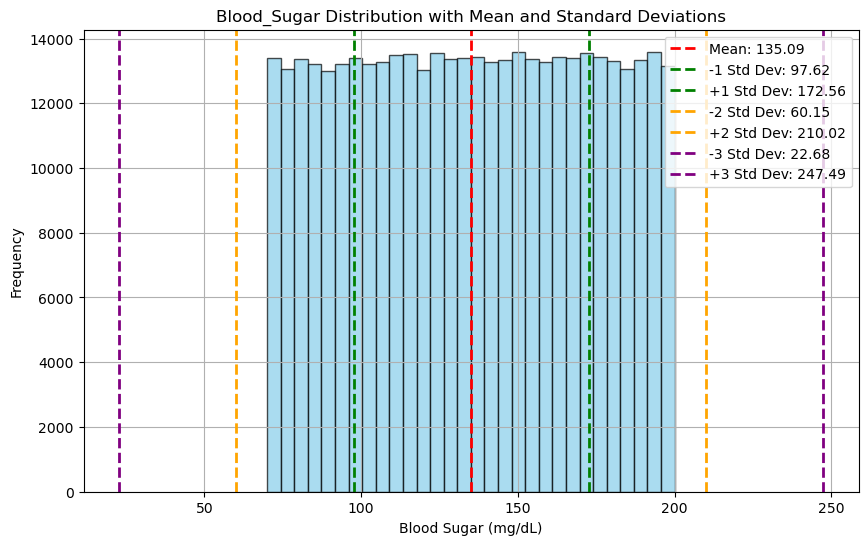

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_column = 'Blood_Sugar'
data = heart_data[data_column].dropna()

mean = np.mean(data)
std_dev = np.std(data)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

for i, color in zip([1, 2, 3], ['green', 'orange', 'purple']):
    plt.axvline(mean - i * std_dev, color=color, linestyle='dashed', linewidth=2,
                label=f'-{i} Std Dev: {mean - i * std_dev:.2f}')
    plt.axvline(mean + i * std_dev, color=color, linestyle='dashed', linewidth=2,
                label=f'+{i} Std Dev: {mean + i * std_dev:.2f}')

plt.title(f'{data_column} Distribution with Mean and Standard Deviations')
plt.xlabel('Blood Sugar (mg/dL)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()


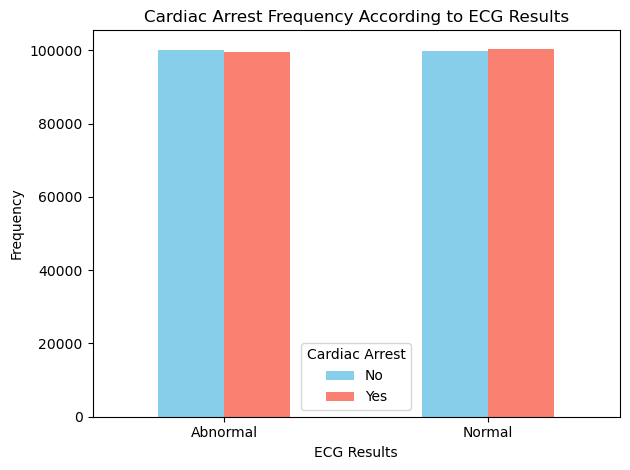

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
pd.crosstab(heart_data['ECG_Results'], heart_data['Cardiac_Arrest']).plot(kind="bar", color=['skyblue', 'salmon'])

plt.title('Cardiac Arrest Frequency According to ECG Results')
plt.xlabel('ECG Results')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Cardiac Arrest')
plt.tight_layout()
plt.show()


## Cardiac Arrest Frequency According to ECG Results


Explanation:
Sky blue bars represent patients who did not have a cardiac arrest.

Salmon bars represent patients who did have a cardiac arrest.

Interpretation:
Both Abnormal and Normal ECG categories show similar frequencies for cardiac arrest outcomes.

This suggests that ECG results alone may not significantly influence the likelihood of cardiac arrest.


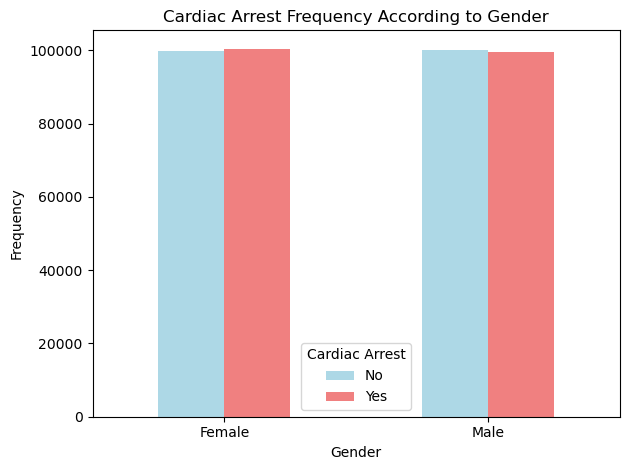

In [29]:
pd.crosstab(heart_data['Gender'], heart_data['Cardiac_Arrest']).plot(kind="bar", color=['lightblue', 'lightcoral'])

plt.title('Cardiac Arrest Frequency According to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Cardiac Arrest')
plt.tight_layout()
plt.show()


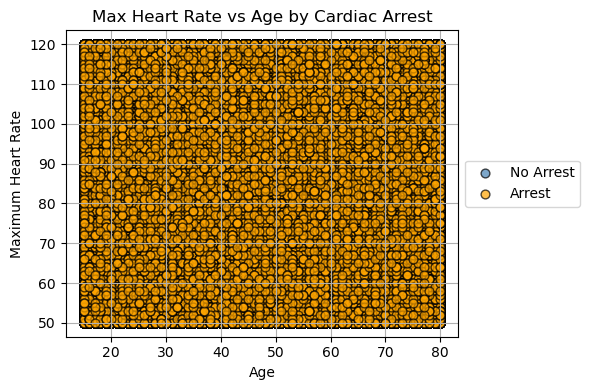

In [30]:
plt.figure(figsize=(6, 4))
plt.scatter(
    heart_data.Age[heart_data.Cardiac_Arrest == 'No'],
    heart_data.Heart_Rate[heart_data.Cardiac_Arrest == 'No'],
    color='steelblue', label='No Arrest', alpha=0.7, edgecolor='black', s=40
)
plt.scatter(
    heart_data.Age[heart_data.Cardiac_Arrest == 'Yes'],
    heart_data.Heart_Rate[heart_data.Cardiac_Arrest == 'Yes'],
    color='orange', label='Arrest', alpha=0.7, edgecolor='black', s=40
)
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Max Heart Rate vs Age by Cardiac Arrest")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


**Max Heart Rate vs Age by Cardiac Arrest (Short Explanation)**

- The scatter plot shows the relationship between **Age** and **Maximum Heart Rate**, categorized by cardiac arrest occurrence (target = 1 or 0):
  - **Blue points (0)**: Patients without cardiac arrest.
  - **Orange points (1)**: Patients with cardiac arrest.
- Both groups are spread across all ages and heart rate levels, indicating **no strong visual separation** between the two based on these features alone.


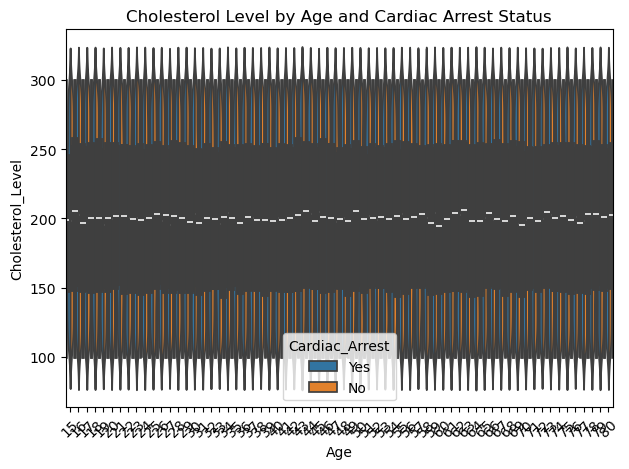

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for cholesterol level across age groups and cardiac arrest status
sns.violinplot(x='Age', y='Cholesterol_Level', hue='Cardiac_Arrest', data=heart_data, split=True)
plt.title("Cholesterol Level by Age and Cardiac Arrest Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Cholesterol Level by Age and Cardiac Arrest Status**

- This violin plot shows the distribution of **cholesterol levels** across different **age groups**, split by **cardiac arrest status** (Yes or No).
- The plot compares cholesterol distributions for patients **with** and **without** cardiac arrest at each age.
- Each violin's **width** indicates the **density of data points** — wider areas represent more patients at that cholesterol level.


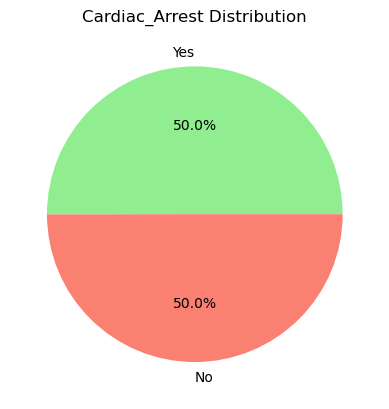

In [34]:
heart_data['Cardiac_Arrest'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title("Cardiac_Arrest Distribution")
plt.ylabel("")
plt.show()


**Cardiac Arrest Distribution**

- This pie chart shows the **proportion of patients** with and without a cardiac arrest diagnosis:
  - **50.0% Yes (light green)**: Patients diagnosed with cardiac arrest.
  - **50.0% No (salmon)**: Patients without a cardiac arrest diagnosis.


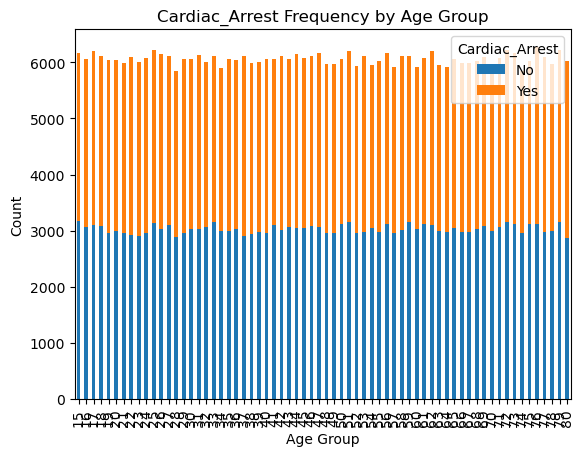

In [36]:
pd.crosstab(heart_data['Age'], heart_data['Cardiac_Arrest']).plot(kind='bar', stacked=True)
plt.title("Cardiac_Arrest Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

BMI distribution is wider among those who had a cardiac arrest. The higher median and spread suggest a possible connection between higher BMI and cardiac risk

# DATA PREPROCESSING

In [39]:
missing_summary = heart_data.isnull().sum()

missing_columns = missing_summary[missing_summary > 0]


if not missing_columns.empty:
    print("After checking, the following columns have missing values:\n")
    print(missing_columns)
else:
    print("No columns with missing values were found.")


After checking, the following columns have missing values:

Follow_Up                   133631
Cholesterol_Level_Binned    219464
dtype: int64


In [40]:
import pandas as pd

missing_values = heart_data.isnull().sum()

print("Missing values per column:")
print(missing_values)


Missing values per column:
Age                              0
Gender                           0
Region                           0
BMI                              0
Smoker                           0
Diabetes                         0
Hypertension                     0
Cholesterol_Level                0
Physical_Activity                0
Diet                             0
Family_History                   0
Stress_Level                     0
Alcohol_Consumption              0
Drug_Use                         0
Sleep_Hours                      0
Blood_Pressure                   0
Heart_Rate                       0
Chest_Pain                       0
ECG_Results                      0
Blood_Sugar                      0
Angina                           0
Cardiac_Arrest                   0
Recovery_Status                  0
Medication                       0
Follow_Up                   133631
Cholesterol_Level_Binned    219464
dtype: int64


In [41]:
!pip install missingno

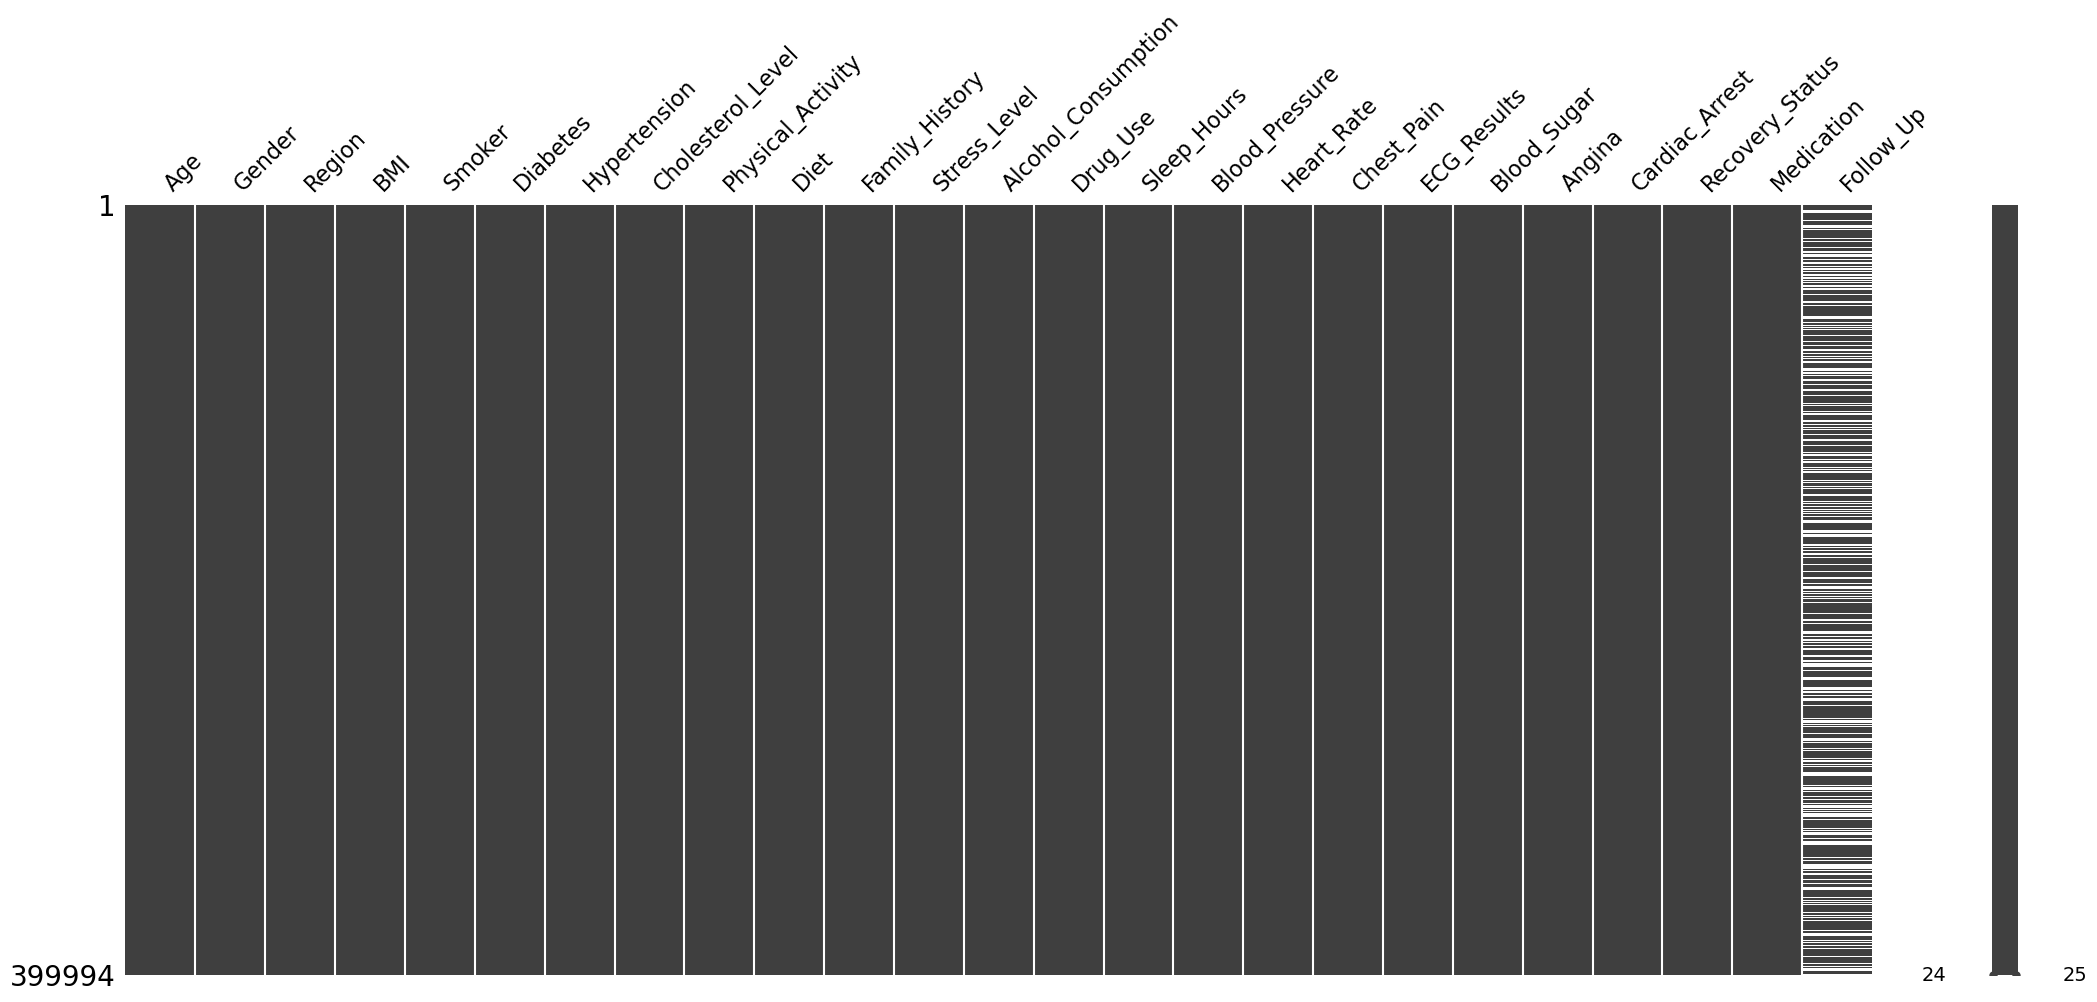

In [42]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

msno.matrix(heart_data)
plt.show()


### Missing Values Heatmap

The heatmap below visually represents the missing values in the dataset.  
Each white bar indicates a missing value for the corresponding feature.

**The `Follow_Up` column shows significant missing data.**


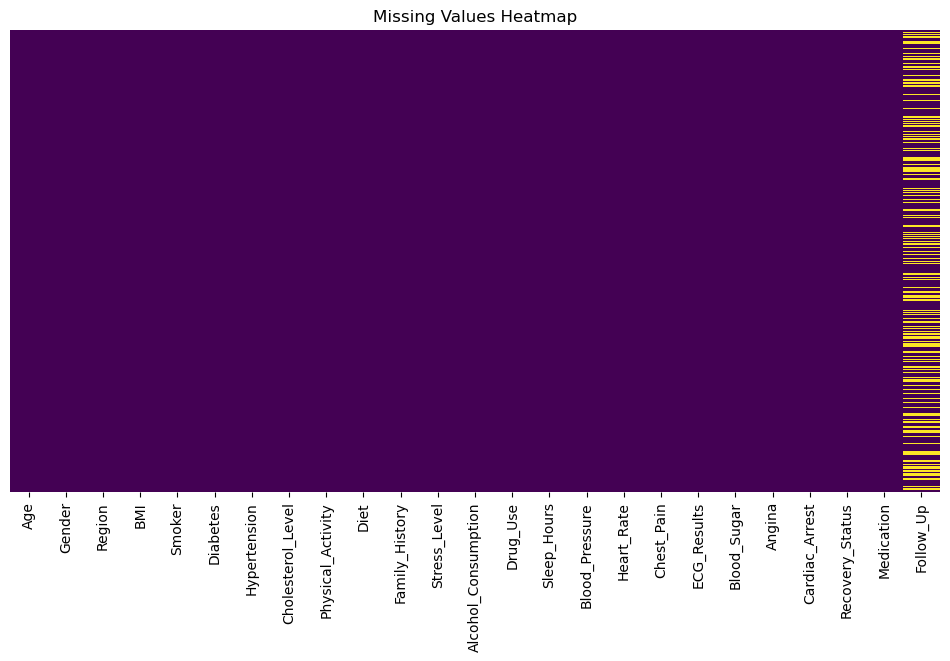

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

missing_data = heart_data.isnull()

plt.figure(figsize=(12, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


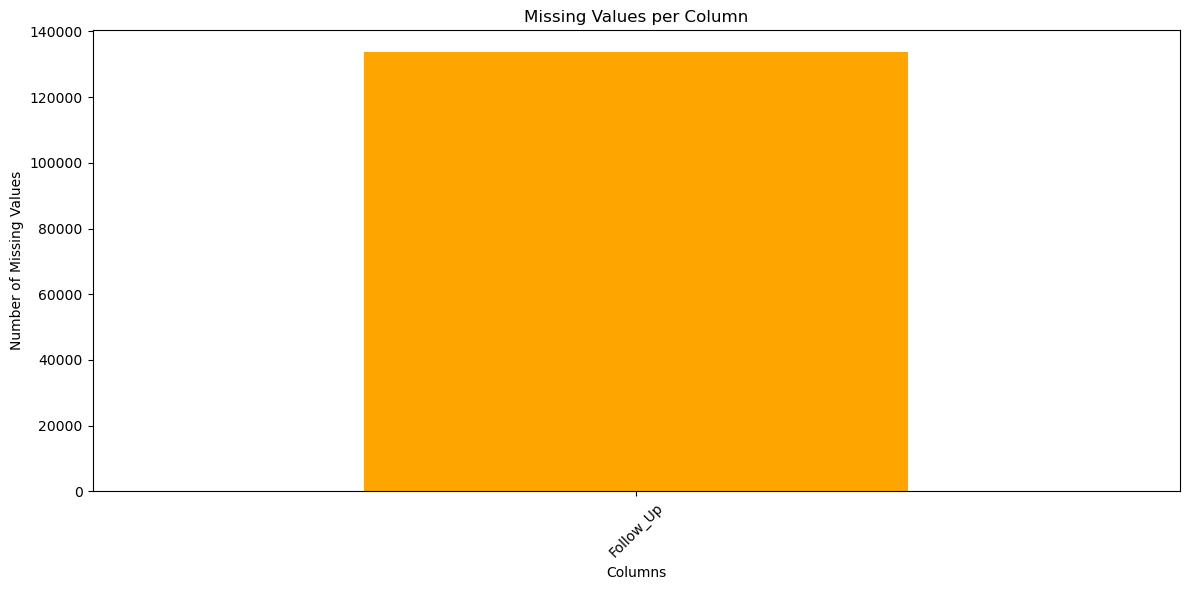

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

missing_counts = heart_data.isnull().sum()

plt.figure(figsize=(12, 6))
missing_counts[missing_counts > 0].plot(kind='bar', color='orange')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Missing Data Analysis
The heatmap below visually represents the missing values in the dataset.  
Each white bar indicates a missing value for the corresponding feature.

**The `Follow_Up` column shows significant missing data.**

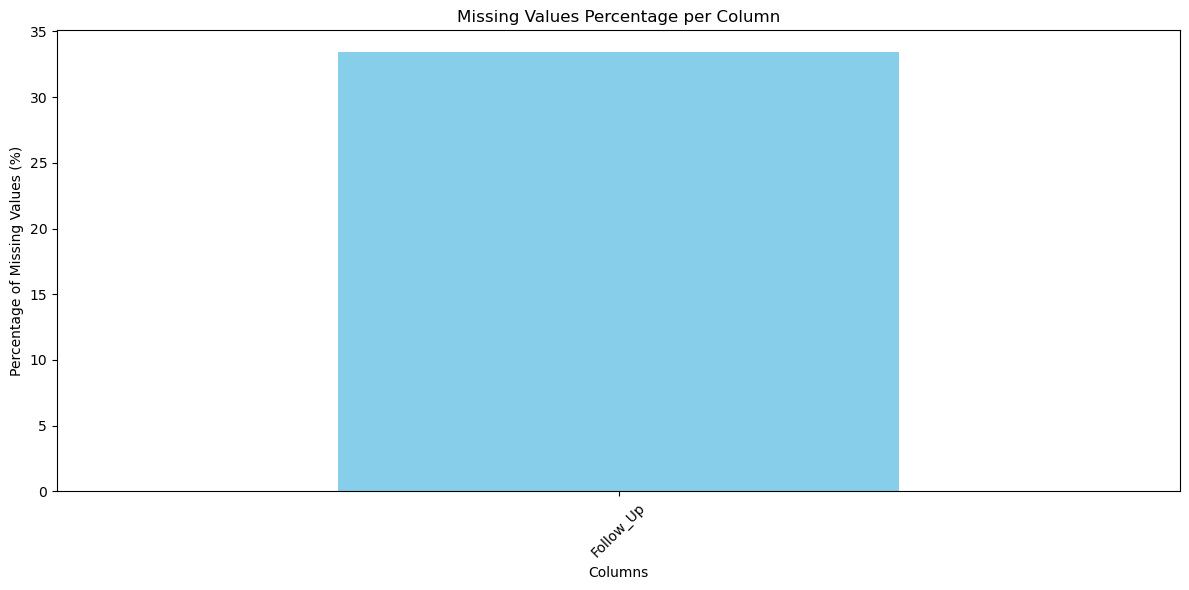

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

missing_percentage = heart_data.isnull().mean() * 100

plt.figure(figsize=(12, 6))
missing_percentage[missing_percentage > 0].plot(kind='bar', color='skyblue')
plt.title("Missing Values Percentage per Column")
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# MISSING VALUES FILL 

In [49]:
import pandas as pd

heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

heart_data.replace({'Follow_Up': ['', ' ', 'NA', 'na']}, pd.NA, inplace=True)


print("Before Imputation:")
print("Missing values in Follow_Up:", heart_data['Follow_Up'].isna().sum())

follow_up_mode = heart_data['Follow_Up'].mode()[0]

heart_data['Follow_Up'] = heart_data['Follow_Up'].fillna(follow_up_mode)

print("\nAfter Imputation:")
print("Missing values in Follow_Up:", heart_data['Follow_Up'].isna().sum())

Before Imputation:
Missing values in Follow_Up: 133631

After Imputation:
Missing values in Follow_Up: 0


### Imputation of Missing Values in `Follow_Up`

**All missing values successfully filled using the most common value.**

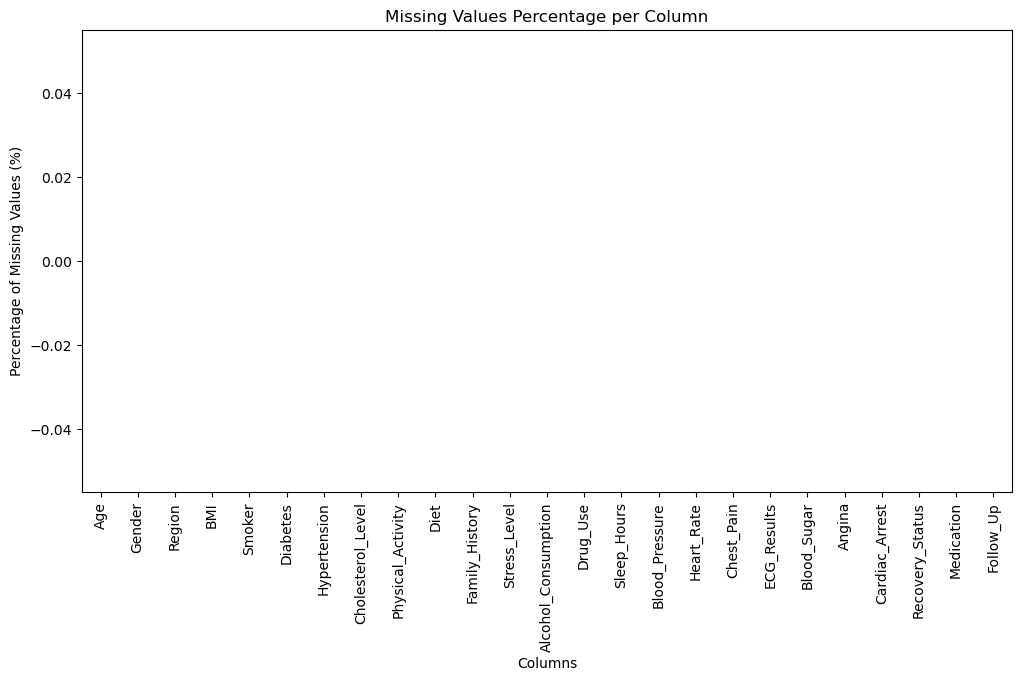

In [51]:
import matplotlib.pyplot as plt

missing_percentage = heart_data.isnull().mean() * 100

plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title("Missing Values Percentage per Column")
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.show()



**Observation:**
- All columns, including `Follow_Up`, now show **0% missing values**.
- This confirms that missing entries in `Follow_Up` were successfully imputed using the **mode**.



In [53]:
import pandas as pd

missing_values = heart_data.isnull().sum()

print("Missing values per column:")
print(missing_values)


Missing values per column:
Age                    0
Gender                 0
Region                 0
BMI                    0
Smoker                 0
Diabetes               0
Hypertension           0
Cholesterol_Level      0
Physical_Activity      0
Diet                   0
Family_History         0
Stress_Level           0
Alcohol_Consumption    0
Drug_Use               0
Sleep_Hours            0
Blood_Pressure         0
Heart_Rate             0
Chest_Pain             0
ECG_Results            0
Blood_Sugar            0
Angina                 0
Cardiac_Arrest         0
Recovery_Status        0
Medication             0
Follow_Up              0
dtype: int64


# String to Int conversion of categorical column (LABEL ENCODING)

In [55]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = heart_data.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    heart_data[col] = le.fit_transform(heart_data[col].astype(str))
    label_encoders[col] = le

print(heart_data.head())


   Age  Gender  Region   BMI  Smoker  Diabetes  Hypertension  \
0   74       0       1  32.1       1         1             1   
1   68       1       1  38.3       1         1             0   
2   50       1       1  31.3       1         1             1   
3   29       1       1  34.0       0         0             0   
4   62       1       1  25.1       0         0             0   

   Cholesterol_Level  Physical_Activity  Diet  ...  Blood_Pressure  \
0              111.5                  2     0  ...             162   
1              276.3                  0     0  ...             150   
2              134.9                  0     1  ...              98   
3              224.8                  0     0  ...              99   
4              128.0                  2     0  ...             128   

   Heart_Rate  Chest_Pain  ECG_Results  Blood_Sugar  Angina  Cardiac_Arrest  \
0          52           0            0        102.0       0               1   
1          97           0           

## Label Encoding of Categorical Features

To prepare the dataset for machine learning algorithms, categorical columns were encoded into numerical format using **Label Encoding**.

###  What is Label Encoding?
Label Encoding converts each categorical value into a unique integer. 

The dataset is now fully numeric and ready for model training.


# Check For Outliers 

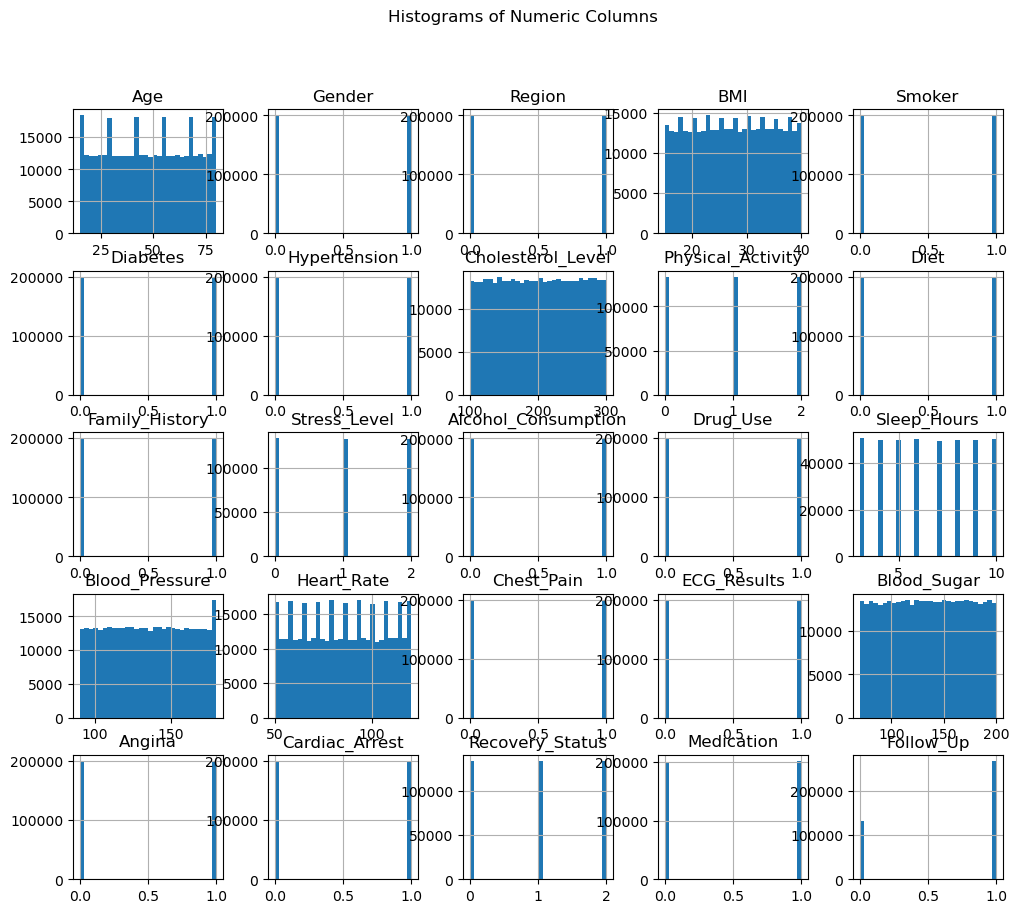

In [58]:
import matplotlib.pyplot as plt
import numpy as np

heart_data.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

### Checking for Outliers

The following histograms display the distribution of all numeric columns in the `heart_data` dataset
These visualizations help identify potential **outliers**, **skewness**, and **data imbalances**.

Based on the histograms, no significant outliers are visually evident. The bars (blue lines) for each numeric column remain well within a reasonable range, and none of the distributions show extreme values that sharply exceed the rest of the data.

### ALL variables in dataset follow a perfect Non Gaussian distribution. EXAMPLE Here's why:

Age: Has a jagged, uneven pattern with several peaks — not bell-shaped.

BMI: Somewhat uniform, not clearly bell-shaped.

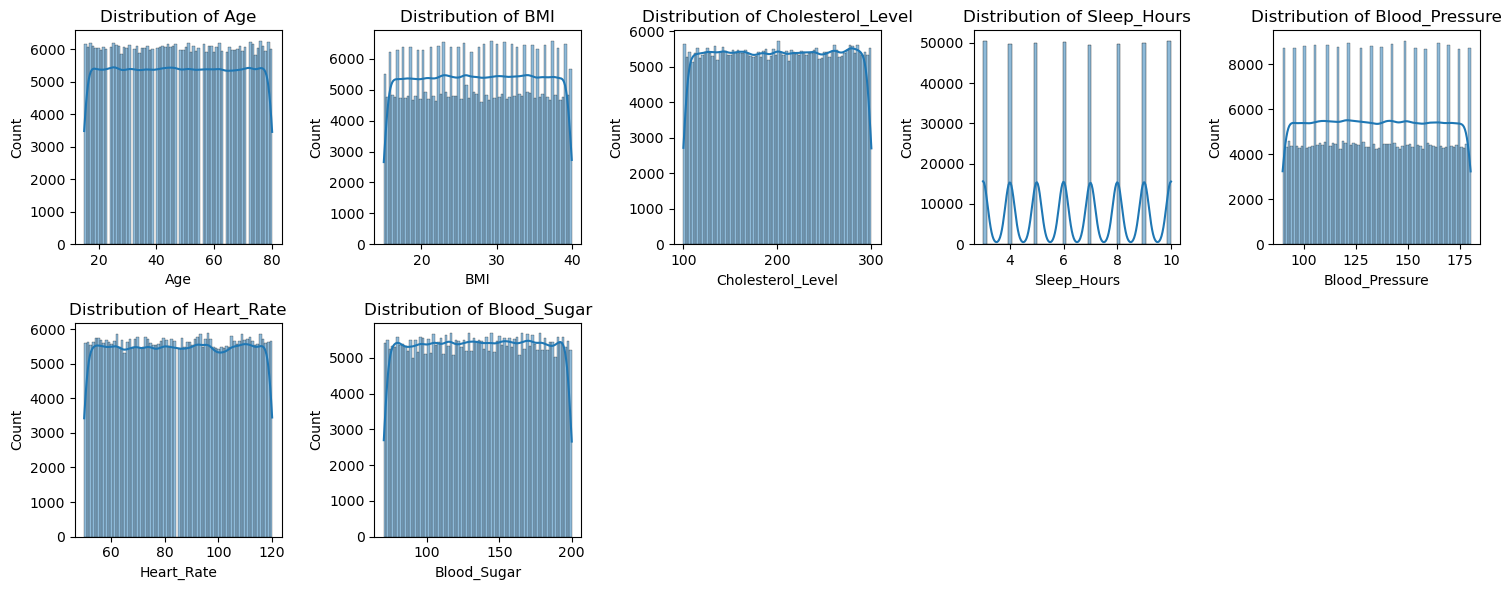

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')
num_cols = len(heart_data.select_dtypes(include=[np.number]).columns)

ncols = 5  
nrows = int(np.ceil(num_cols / ncols)) 

plt.figure(figsize=(ncols * 3, nrows * 3))

for i, col in enumerate(heart_data.select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i + 1)  
    sns.histplot(heart_data[col], kde=True) 
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


### Summary of Distributions
All features (Age, BMI, Cholesterol_Level, Sleep_Hours, Blood_Pressure, Heart_Rate, Blood_Sugar) show uniform distributions.

No significant outliers are visible — the bars and KDE lines stay within normal range limits.

Overall, the data appears clean and well-distributed, with no extreme values needing removal.

# IQR Method (For Non-Gaussian Distributed Data)

In [63]:
import numpy as np
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

Q1 = heart_data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = heart_data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((heart_data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
                (heart_data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

outliers_count_iqr = outliers_iqr.sum()

outliers_count_iqr_heart_data = pd.DataFrame(outliers_count_iqr, index=heart_data.select_dtypes(include=[np.number]).columns, columns=["Outliers Count"])
print(outliers_count_iqr_heart_data)


                   Outliers Count
Age                             0
BMI                             0
Cholesterol_Level               0
Sleep_Hours                     0
Blood_Pressure                  0
Heart_Rate                      0
Blood_Sugar                     0


### The Interquartile Range (IQR) method was applied to detect outliers in non-Gaussian distributed numeric features.

- No outliers were detected in any of the selected features using the IQR method.
- This confirms the dataset is **clean and consistent** for these variables.
- Further analysis can proceed without the need for outlier handling on these columns.


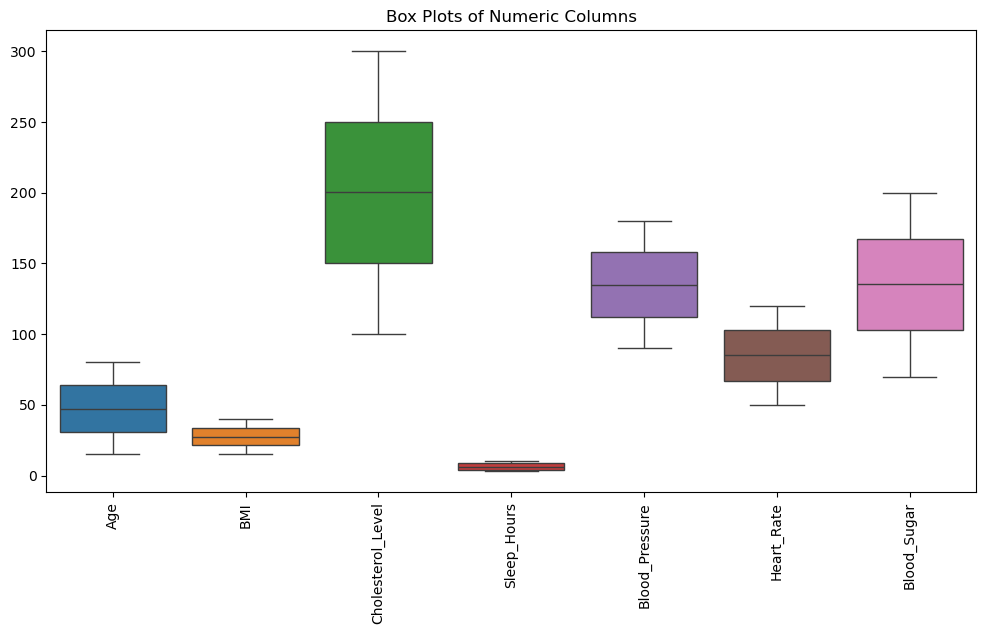

In [65]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=heart_data.select_dtypes(include=[np.number]))
plt.title("Box Plots of Numeric Columns")
plt.xticks(rotation=90)
plt.show()


ion:

- The box plots show **no data points outside the whiskers**, which indicates that there are **no visible outliers** in these features.
- All values fall within the interquartile range (IQR), confirming the dataset is **clean and free from extreme vric columns.


Class Distribution:
 Cardiac_Arrest
Yes    200093
No     199901
Name: count, dtype: int64


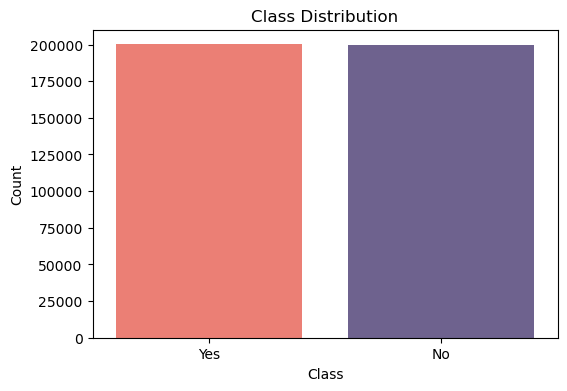

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = heart_data["Cardiac_Arrest"].value_counts()
print("Class Distribution:\n", class_counts)

plt.figure(figsize=(6, 4))
sns.countplot(data=heart_data, x="Cardiac_Arrest", 
              hue="Cardiac_Arrest", 
              palette=["#FF6F61", "#6B5B95"], 
              legend=False)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


- The bar chart above illustrates the class distribution for the Cardiac Arrest (Target) column. The number of 'Yes' and 'No' cases are nearly equal:
- Yes: 200,093
- No: 199,901
- The class distribution is mostly balanced, so the dataset is suitable for model training without requiring major resampling techniques.

# FEATURE ENGINEERING

In [70]:
import pandas as pd
import numpy as np

# Load the original CSV
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Create the Health_Risk_Combo column
heart_data['Health_Risk_Combo'] = (
    heart_data['Hypertension'].map({'Yes': 1, 'No': 0}) +
    heart_data['Diabetes'].map({'Yes': 1, 'No': 0}) +
    (heart_data['Cholesterol_Level'] > 200).astype(int)
)

# Save to a new CSV file
heart_data.to_csv('h_a_y_vs_a_p_with_risk.csv', index=False)

new_data = pd.read_csv('h_a_y_vs_a_p_with_risk.csv')
print(new_data[['Hypertension', 'Diabetes', 'Cholesterol_Level', 'Health_Risk_Combo']].head())


  Hypertension Diabetes  Cholesterol_Level  Health_Risk_Combo
0          Yes      Yes              111.5                  2
1           No      Yes              276.3                  2
2          Yes      Yes              134.9                  2
3           No       No              224.8                  1
4           No       No              128.0                  0


- A new feature **Health_Risk_Combo** has been engineered using:
- Hypertension
- Diabetes
- Cholesterol_Level

- This column combines these three health indicators to reflect a health risk score based on:
- 1 point for each condition (Hypertension, Diabetes),
- 1 point if cholesterol level > 200.
- This results in a simple risk ratio from 0 to 3 for each patient record.

In [72]:
import pandas as pd
import numpy as np

# Load the original CSV
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Add the Health_Risk_Combo column
heart_data['Health_Risk_Combo'] = (
    heart_data['Hypertension'].map({'Yes': 1, 'No': 0}) +
    heart_data['Diabetes'].map({'Yes': 1, 'No': 0}) +
    (heart_data['Cholesterol_Level'] > 200).astype(int)
)

print(heart_data.head())


   Age  Gender Region   BMI Smoker Diabetes Hypertension  Cholesterol_Level  \
0   74  Female  Urban  32.1    Yes      Yes          Yes              111.5   
1   68    Male  Urban  38.3    Yes      Yes           No              276.3   
2   50    Male  Urban  31.3    Yes      Yes          Yes              134.9   
3   29    Male  Urban  34.0     No       No           No              224.8   
4   62    Male  Urban  25.1     No       No           No              128.0   

  Physical_Activity       Diet  ... Heart_Rate Chest_Pain ECG_Results  \
0          Moderate    Healthy  ...         52         No    Abnormal   
1              High    Healthy  ...         97         No      Normal   
2              High  Unhealthy  ...         67        Yes      Normal   
3              High    Healthy  ...         87         No      Normal   
4          Moderate    Healthy  ...         89         No    Abnormal   

  Blood_Sugar  Angina  Cardiac_Arrest  Recovery_Status Medication  Follow_Up  \
0     

In [73]:
# Define BMI category function
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply and create BMI_Category
heart_data['BMI_Category'] = heart_data['BMI'].apply(bmi_category)

heart_data.to_csv('h_a_y_vs_a_p_with_risk.csv', index=False)
new_data = pd.read_csv('h_a_y_vs_a_p_with_risk.csv')
print(new_data[['BMI', 'BMI_Category']].head())


    BMI BMI_Category
0  32.1        Obese
1  38.3        Obese
2  31.3        Obese
3  34.0        Obese
4  25.1   Overweight


- New feature **BMI_Category** was created by classifying BMI values into standard health categories:
- Underweight: BMI < 18.5
- Normal: 18.5 ≤ BMI < 25
- Overweight: 25 ≤ BMI < 30
- Obese: BMI ≥ 30

- This helps in grouping patients based on body weight categories for better health analysis

In [75]:
# Add Is_Youth column (Age < 40)
heart_data['Is_Youth'] = (heart_data['Age'] < 40).astype(int)

heart_data.to_csv('h_a_y_vs_a_p_with_risk.csv', index=False)
new_data = pd.read_csv('h_a_y_vs_a_p_with_risk.csv')
print(new_data[['Age', 'Is_Youth']].head())


   Age  Is_Youth
0   74         0
1   68         0
2   50         0
3   29         1
4   62         0


- A new binary feature **Is_Youth** was created:
- 1 if the person is under 40 years old

- 0 otherwise

- This helps in identifying younger individuals, which may be a relevant subgroup in risk prediction models or demographic analysis.

In [77]:
# Add High_Blood_Sugar flag (threshold > 140 mg/dL)
heart_data['High_Blood_Sugar'] = (heart_data['Blood_Sugar'] > 140).astype(int)

heart_data.to_csv('h_a_y_vs_a_p_with_risk.csv', index=False)
new_data = pd.read_csv('h_a_y_vs_a_p_with_risk.csv')
print(new_data[['Blood_Sugar', 'High_Blood_Sugar']].head())

   Blood_Sugar  High_Blood_Sugar
0        102.0                 0
1        186.9                 1
2         71.4                 0
3        191.0                 1
4        184.1                 1


- new binary feature **High_Blood_Sugar** was added
- 1 if blood sugar level is greater than 140 mg/dL
- 0 otherwise

This helps flag individuals with potentially concerning blood sugar levels, useful in identifying diabetes risk or monitoring health trends.

In [79]:
# Add Severe_Cardiac_Condition flag
heart_data['Severe_Cardiac_Condition'] = (
    (heart_data['Angina'] == 'Yes') |
    (heart_data['Chest_Pain'] == 'Yes') |
    (heart_data['ECG_Results'] == 'Abnormal')
).astype(int)

heart_data.to_csv('h_a_y_vs_a_p_with_risk.csv', index=False)
new_data = pd.read_csv('h_a_y_vs_a_p_with_risk.csv')
print(new_data[['Angina', 'Chest_Pain', 'ECG_Results', 'Severe_Cardiac_Condition']].head())


  Angina Chest_Pain ECG_Results  Severe_Cardiac_Condition
0     No         No    Abnormal                         1
1    Yes         No      Normal                         1
2     No        Yes      Normal                         1
3     No         No      Normal                         0
4    Yes         No    Abnormal                         1


-  New binary feature **Severe_Cardiac_Condition** created using:
- Presence of Angina
- Presence of Chest Pain
- Abnormal ECG results

- This feature flags patients at higher risk of severe cardiac events based on these critical clinical symptoms or test outcomes.

In [81]:
# Add Medication_Compliance flag
heart_data['Medication_Compliance'] = (
    (heart_data['Medication'] == 'Yes') & (heart_data['Follow_Up'] != 'None')
).astype(int)

heart_data.to_csv('h_a_y_vs_a_p_with_risk.csv', index=False)
new_data = pd.read_csv('h_a_y_vs_a_p_with_risk.csv')
print(new_data[['Medication', 'Follow_Up', 'Medication_Compliance']].head())


  Medication  Follow_Up  Medication_Compliance
0        Yes  Irregular                      1
1        Yes    Regular                      1
2         No        NaN                      0
3        Yes    Regular                      1
4         No  Irregular                      0


- New binary feature **Medication_Compliance** created based on:
- Medication = 'Yes'
- Follow_Up is not 'None'
- This feature flags patients who are likely compliant with treatment by checking if they are on medication and also adhering to some form of follow-up regimen (regular or irregular).

# PRINT NEW DATA WITH FEATURE ENGINEERING COLUMNS

In [84]:
print(heart_data.head())


   Age  Gender Region   BMI Smoker Diabetes Hypertension  Cholesterol_Level  \
0   74  Female  Urban  32.1    Yes      Yes          Yes              111.5   
1   68    Male  Urban  38.3    Yes      Yes           No              276.3   
2   50    Male  Urban  31.3    Yes      Yes          Yes              134.9   
3   29    Male  Urban  34.0     No       No           No              224.8   
4   62    Male  Urban  25.1     No       No           No              128.0   

  Physical_Activity       Diet  ... Cardiac_Arrest Recovery_Status Medication  \
0          Moderate    Healthy  ...            Yes         Ongoing        Yes   
1              High    Healthy  ...             No        Deceased        Yes   
2              High  Unhealthy  ...            Yes         Ongoing         No   
3              High    Healthy  ...             No       Recovered        Yes   
4          Moderate    Healthy  ...             No       Recovered         No   

   Follow_Up  Health_Risk_Combo  BMI_C

In [85]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = heart_data.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    heart_data[col] = le.fit_transform(heart_data[col].astype(str))
    label_encoders[col] = le

print(heart_data.head())


   Age  Gender  Region   BMI  Smoker  Diabetes  Hypertension  \
0   74       0       1  32.1       1         1             1   
1   68       1       1  38.3       1         1             0   
2   50       1       1  31.3       1         1             1   
3   29       1       1  34.0       0         0             0   
4   62       1       1  25.1       0         0             0   

   Cholesterol_Level  Physical_Activity  Diet  ...  Cardiac_Arrest  \
0              111.5                  2     0  ...               1   
1              276.3                  0     0  ...               0   
2              134.9                  0     1  ...               1   
3              224.8                  0     0  ...               0   
4              128.0                  2     0  ...               0   

   Recovery_Status  Medication  Follow_Up  Health_Risk_Combo  BMI_Category  \
0                1           1          0                  2             1   
1                0           1        

In [86]:
import pandas as pd
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

columns_to_drop = [
    'Hypertension',
    'Diabetes',
    'Angina',
    'Chest_Pain',
    'ECG_Results',
    'Medication',
    'Follow_Up'
]
heart_data.drop(columns=columns_to_drop, inplace=True)

In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data only once
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Add your new columns (if done in a previous script, do it before this point again if needed)
heart_data['Health_Risk_Combo'] = (
    heart_data['Hypertension'] + heart_data['Diabetes']
)
heart_data['BMI_Category'] = heart_data['BMI'].apply(lambda x: 1 if x >= 25 else 2)
heart_data['Is_Youth'] = heart_data['Age'].apply(lambda x: 1 if x < 35 else 0)
heart_data['High_Blood_Sugar'] = heart_data['Cholesterol_Level'].apply(lambda x: 1 if x > 200 else 0)
heart_data['Severe_Cardiac_Condition'] = heart_data['Cardiac_Arrest']
heart_data['Medication_Compliance'] = heart_data['Medication']

# Drop specified columns
columns_to_drop = [
    'Hypertension',
    'Diabetes',
    'Angina',
    'Chest_Pain',
    'ECG_Results',
    'Medication',
    'Follow_Up'
]
heart_data.drop(columns=columns_to_drop, inplace=True)

# Initialize LabelEncoder
le = LabelEncoder()

# Identify columns to encode (object or category dtype)
categorical_cols = heart_data.select_dtypes(include=['object', 'category']).columns

# Apply label encoding
for col in categorical_cols:
    heart_data[col] = le.fit_transform(heart_data[col])

print("Label encoding applied to columns:", list(categorical_cols))

# Optional: Display the updated dataframe to confirm changes
print(heart_data.head())


Label encoding applied to columns: ['Gender', 'Region', 'Smoker', 'Physical_Activity', 'Diet', 'Family_History', 'Stress_Level', 'Alcohol_Consumption', 'Drug_Use', 'Cardiac_Arrest', 'Recovery_Status', 'Health_Risk_Combo', 'Severe_Cardiac_Condition', 'Medication_Compliance']
   Age  Gender  Region   BMI  Smoker  Cholesterol_Level  Physical_Activity  \
0   74       0       1  32.1       1              111.5                  2   
1   68       1       1  38.3       1              276.3                  0   
2   50       1       1  31.3       1              134.9                  0   
3   29       1       1  34.0       0              224.8                  0   
4   62       1       1  25.1       0              128.0                  2   

   Diet  Family_History  Stress_Level  ...  Heart_Rate  Blood_Sugar  \
0     0               1             0  ...          52        102.0   
1     0               1             0  ...          97        186.9   
2     1               1             0  ... 

- Dropping redundant columns simplifies the dataset, reduces noise, and helps models focus on more meaningful, compact features

# FEATURE SELECTION THROUGH FCLASSIF

In [90]:
from sklearn.feature_selection import SelectKBest, f_classif

X = heart_data.drop(columns=['Cardiac_Arrest', 'Severe_Cardiac_Condition'])
y = heart_data['Cardiac_Arrest']

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get feature scores and names
feature_scores = selector.scores_
feature_names = X.columns

# Calculate total score
total_score = feature_scores.sum()

# Print total score
print(f"Total score (sum of all feature scores): {total_score:.4f}\n")

# Print each feature with its score
print("Feature Name\t\tScore")
for name, score in zip(feature_names, feature_scores):
    print(f"{name}\t\t{score:.4f}")

Total score (sum of all feature scores): 32.1600

Feature Name		Score
Age		4.9795
Gender		3.4208
Region		0.1212
BMI		0.1550
Smoker		1.0836
Cholesterol_Level		0.0001
Physical_Activity		1.2545
Diet		3.3524
Family_History		2.7134
Stress_Level		1.7544
Alcohol_Consumption		0.6825
Drug_Use		2.6215
Sleep_Hours		0.7177
Blood_Pressure		0.3785
Heart_Rate		1.9989
Blood_Sugar		0.9554
Recovery_Status		0.0960
Health_Risk_Combo		3.4987
BMI_Category		0.1152
Is_Youth		1.5910
High_Blood_Sugar		0.2185
Medication_Compliance		0.4511


# FEATURE SELECTION THROUGH RANDOM FOREST

In [190]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Get feature importances
rf_importances = rf.feature_importances_

# Create a DataFrame of feature names and importance scores
rf_feature_scores = pd.DataFrame({
    'Feature Name': X.columns,
    'Importance Score': rf_importances
})

# Sort features by importance
rf_feature_scores = rf_feature_scores.sort_values(by='Importance Score', ascending=False).reset_index(drop=True)

# Print total importance score
print(f"\nTotal importance score (Random Forest): {rf_importances.sum():.4f}\n")

# Print each feature with its importance
print("Feature Name\t\tImportance Score")
for name, score in zip(rf_feature_scores['Feature Name'], rf_feature_scores['Importance Score']):
    print(f"{name}\t\t{score:.4f}")



Total importance score (Random Forest): 1.0000

Feature Name		Importance Score
Cholesterol_Level		0.1143
Blood_Sugar		0.1136
BMI		0.1089
Blood_Pressure		0.1007
Heart_Rate		0.0979
Age		0.0963
Sleep_Hours		0.0546
Recovery_Status		0.0279
Stress_Level		0.0276
Physical_Activity		0.0272
Follow_Up		0.0249
Region		0.0174
Hypertension		0.0171
Angina		0.0171
ECG_Results		0.0168
Alcohol_Consumption		0.0168
Medication		0.0166
Smoker		0.0160
Family_History		0.0158
Gender		0.0156
Diet		0.0155
Drug_Use		0.0152
Diabetes		0.0140
Chest_Pain		0.0121


# FEATURE SELECTION THROUGH F1 SCORE

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1_scores = []

# Loop through each feature
for feature in feature_names:
    X_feature = X[[feature]]  # Single feature
    scores = cross_val_score(
        LogisticRegression(max_iter=1000),
        X_feature,
        y,
        cv=5,
        scoring=make_scorer(f1_score)
    )
    f1_scores.append(scores.mean())

# Calculate total F1 score
total_f1_score = np.sum(f1_scores)

# Print total score
print(f"\n Total F1 score (sum of all single-feature F1s): {total_f1_score:.4f}\n")

# Print individual F1 scores
print("Feature Name\t\tF1 Score")
for name, score in zip(feature_names, f1_scores):
    print(f"{name}\t\t{score:.4f}")





 Total F1 score (sum of all single-feature F1s): 12.0091

Feature Name		F1 Score
Age		0.5202
Gender		0.5019
Region		0.5662
BMI		0.6426
Smoker		0.5005
Cholesterol_Level		0.6038
Physical_Activity		0.5906
Diet		0.5016
Family_History		0.5017
Stress_Level		0.5727
Alcohol_Consumption		0.5002
Drug_Use		0.5014
Sleep_Hours		0.5558
Blood_Pressure		0.6129
Heart_Rate		0.5309
Blood_Sugar		0.5453
Recovery_Status		0.6476
Health_Risk_Combo		0.5008
BMI_Category		0.6669
Is_Youth		0.3789
High_Blood_Sugar		0.5318
Medication_Compliance		0.5349


# FEATURE SELECTION THROUGH PCA

In [96]:
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Prepare features (X) and target (y)
X = heart_data.drop(columns=['Cardiac_Arrest', 'Severe_Cardiac_Condition'], errors='ignore')
y = heart_data['Cardiac_Arrest']

# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = IncrementalPCA(n_components=10)  # You can increase this number
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
total_variance = explained_variance.sum()

# Print total explained variance
print(f"Total explained variance (sum of selected components): {total_variance:.4f}\n")

# Print each principal component and its explained variance ratio
print("Principal Component\tExplained Variance Ratio")
for i, ratio in enumerate(explained_variance):
    print(f"PC{i+1}\t\t\t{ratio:.4f}")


Total explained variance (sum of selected components): 0.4173

Principal Component	Explained Variance Ratio
PC1			0.0423
PC2			0.0421
PC3			0.0420
PC4			0.0419
PC5			0.0419
PC6			0.0416
PC7			0.0415
PC8			0.0415
PC9			0.0413
PC10			0.0412


# PCA component loadings

In [98]:

loadings = pd.DataFrame(
    data=pca.components_.T,  # Transpose so rows = features
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X.columns  # Feature names as index
)

# Show top 10 principal components
print("PCA Loadings (How original features contribute to each PC):\n")
print(loadings.iloc[:, :10])  # Only first 10 PCs


PCA Loadings (How original features contribute to each PC):

                          PC1       PC2       PC3       PC4       PC5  \
Age                  0.029548 -0.014343 -0.223913  0.249608 -0.115728   
Gender              -0.142629 -0.324173  0.158812 -0.100585 -0.383033   
Region               0.039959 -0.347731  0.059570 -0.016485 -0.078976   
BMI                  0.365400  0.268047  0.162332  0.185615 -0.036166   
Smoker              -0.000780  0.138679  0.089969  0.124759 -0.276822   
Diabetes            -0.177085 -0.146740  0.107692 -0.004630  0.194750   
Hypertension         0.071300 -0.312968  0.106330  0.163594  0.528313   
Cholesterol_Level    0.287955  0.008841  0.199140  0.114418 -0.249033   
Physical_Activity   -0.260934  0.441274  0.256269 -0.009168  0.143347   
Diet                -0.002839  0.031274  0.081235  0.197347  0.009840   
Family_History       0.259408 -0.013329 -0.244777  0.389957  0.124948   
Stress_Level         0.036329 -0.112001 -0.330523 -0.156546  0.

# THE REASON TO DO FEATURE SELECTION THROUGH FOUR WAYS IS TO NOW SELECT THE MOST COMMON FEATURES 

<Figure size 800x500 with 0 Axes>

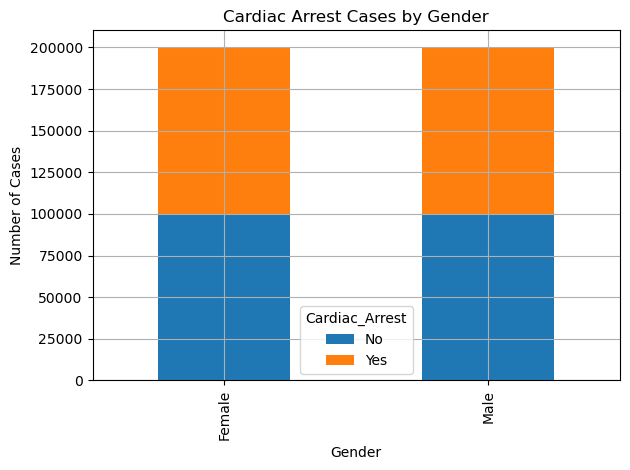

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Plot: Gender vs. Cardiac Arrest (stacked bar chart)
plt.figure(figsize=(8,5))
heart_data.groupby(['Gender', 'Cardiac_Arrest']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Cardiac Arrest Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


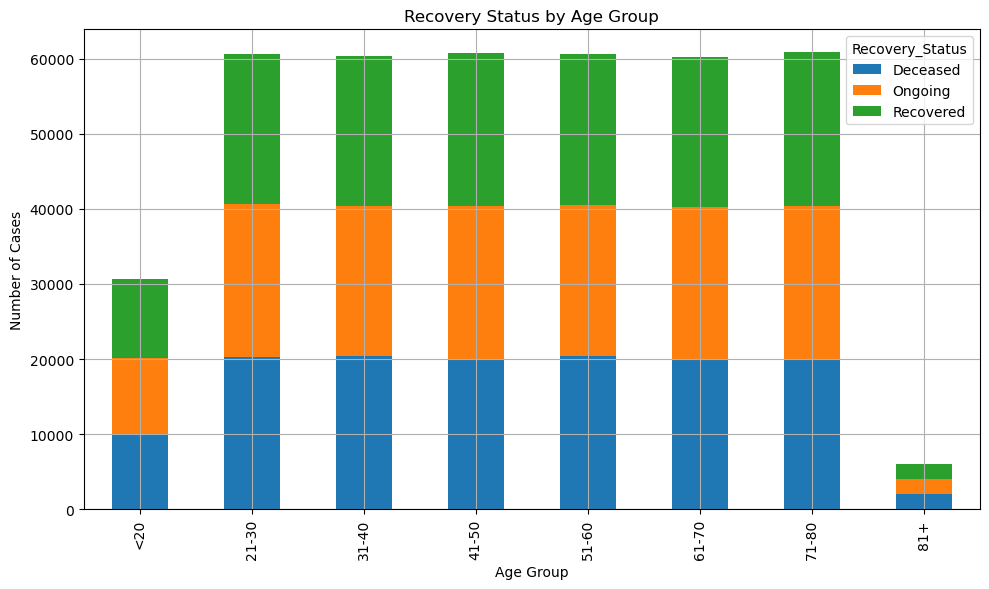

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Create age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
heart_data['Age_Group'] = pd.cut(heart_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group data (suppressing the FutureWarning)
grouped_data = heart_data.groupby(['Age_Group', 'Recovery_Status'], observed=True).size().unstack()

# Plot the grouped data (no need for plt.figure())
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title("Recovery Status by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Number of Cases")
ax.grid(True)

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

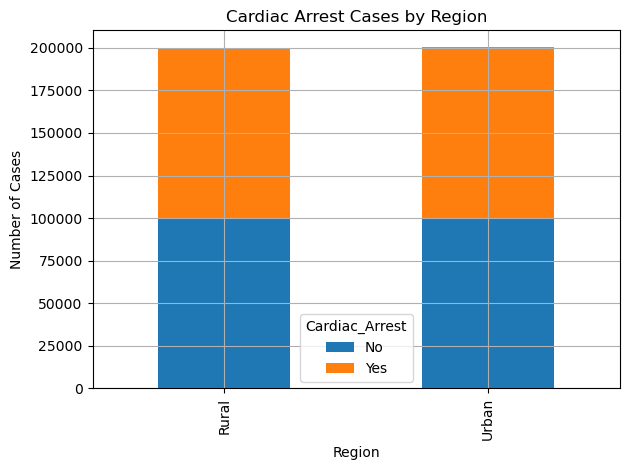

In [102]:
import pandas as pd
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')
# Plot: Cardiac Arrest by Region (Urban vs Rural)
plt.figure(figsize=(8,5))
heart_data.groupby(['Region', 'Cardiac_Arrest']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Cardiac Arrest Cases by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


In [103]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


# Wordcloud use for getting most no of column values

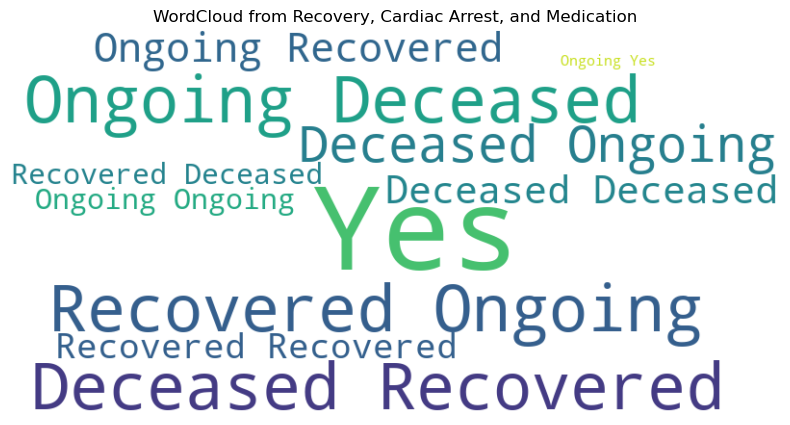

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Columns to include in the WordCloud
text_columns = ['Recovery_Status', 'Cardiac_Arrest', 'Medication']

text_list = []
for col in text_columns:
    text_list.extend(heart_data[col].dropna().astype(str).tolist())

# Join into a single string for the word cloud
text_data = ' '.join(text_list)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from Recovery, Cardiac Arrest, and Medication")
plt.show()


# MODEL SELECTION 
# 1. Decision Tree Classifier

=== Decision Tree Classification Metrics ===
Accuracy : 0.9016487706096327
Precision: 0.9062319604447456
Recall   : 0.8973135515296106
F1 Score : 0.901750705526835


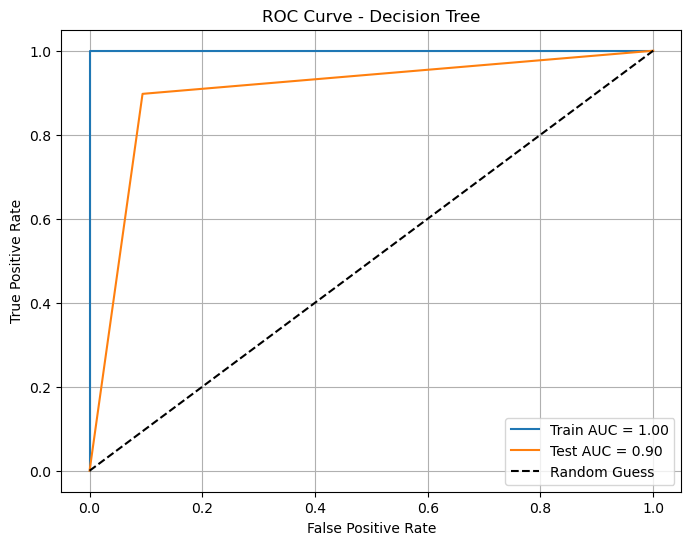

In [107]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load dataset
heart_data = pd.read_csv("h_a_y_vs_a_p.csv")

# Step 2: Drop unnecessary columns
columns_to_drop = ['Hypertension', 'Diabetes', 'Angina', 'Chest_Pain', 'ECG_Results', 'Medication', 'Follow_Up']
heart_data.drop(columns=columns_to_drop, inplace=True)

# Step 3: Label encode all object-type (categorical) columns
le = LabelEncoder()
for col in heart_data.select_dtypes(include=['object']).columns:
    heart_data[col] = le.fit_transform(heart_data[col])

# Step 4: Define features and target
X = heart_data.drop("Cardiac_Arrest", axis=1)
y = heart_data["Cardiac_Arrest"]

# Step 5: Encode target if still object
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 8: Make predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
y_train_prob = dt_model.predict_proba(X_train)[:, 1]
y_test_prob = dt_model.predict_proba(X_test)[:, 1]

# Step 9: Print classification metrics
print("=== Decision Tree Classification Metrics ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# Step 10: Plot ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



**Classification Metrics:**
- **Accuracy**: `0.9016` — ~90.16% of the predictions on the test set were correct.
- **Precision**: `0.9062` — ~90.62% of the positive predictions were correct.
- **Recall**: `0.8973` — ~89.73% of actual positives were correctly identified.
- **F1 Score**: `0.9018` — Harmonic mean of precision and recall, indicating a good balance.

These metrics indicate strong model performance with a good balance between precision and recall.

---

** ROC Curve Analysis:**
- **Train AUC**: `1.00` — Perfect training performance, which may indicate overfitting.
- **Test AUC**: `0.90` — Strong performance on unseen data, showing good generalization.

The ROC curve compares the True Positive Rate (TPR) against the False Positive Rate (FPR). The diagonal line represents random guessing (AUC = 0.5). Curves above this line indicate better model performance.


In [109]:
!pip uninstall scikit-learn -y
!pip install scikit-learn --upgrade --no-cache-dir


Found existing installation: scikit-learn 1.7.0
Uninstalling scikit-learn-1.7.0:
  Successfully uninstalled scikit-learn-1.7.0


You can safely remove it manually.


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB 222.6 kB/s eta 0:00:48
   ---------------------------------------- 0.0/10.7 MB 220.2 kB/s eta 0:00:49
   ---------------------------------------- 0.0/10.7 MB 219.4 kB/s eta 0:00:49
   ---------------------------------------- 0.1/10.7 MB 302.7 kB/s eta 0:00:36
   ---------------------------------------- 0.1/10.7 MB 450.6 kB/s eta 0:00:24
    --------------------------------------- 0.3/10.7 MB 787.7 kB/s eta 0:00:14
   - -------------------------------------- 0.5/10.7 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.7 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.7 MB 1.5 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/10.7 MB 1.7 MB/s eta 0:00:06
   ---- 

# 2. Naive Bayes

=== Naive Bayes ===
Accuracy: 0.5015562694533682
Precision: 0.5049648098641497
Recall: 0.4600263426029474
F1 Score: 0.4814492112826248


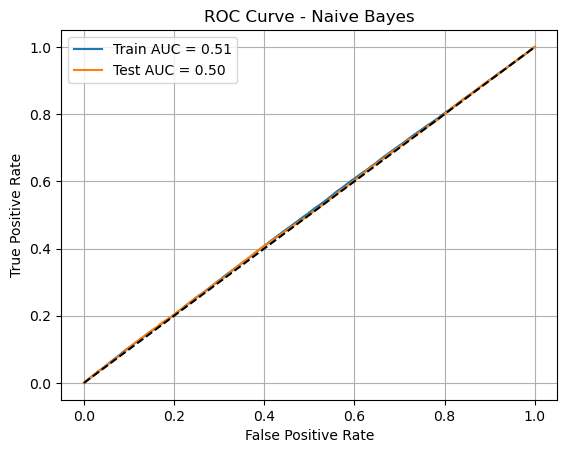

In [111]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)
y_train_prob = nb_model.predict_proba(X_train)[:, 1]
y_test_prob = nb_model.predict_proba(X_test)[:, 1]

# Metrics
print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



**Classification Metrics:**
- **Accuracy**: `0.5016` — About 50.16% of predictions on the test set were correct, which is close to random guessing.
- **Precision**: `0.5049` — Just over half of the positive predictions were correct.
- **Recall**: `0.4600` — Only 46% of actual positive cases were correctly identified.
- **F1 Score**: `0.4814` — Low F1 score suggests poor balance between precision and recall.

These results indicate **poor model performance**, with metrics hovering around the 0.5 mark, implying the model is not effectively learning from the data.

---

**ROC Curve Analysis:**
- **Train AUC**: `0.51` — Slightly better than random guessing on training data.
- **Test AUC**: `0.50` — Performance is equivalent to random guessing on the test data.

The ROC curve closely follows the diagonal line (AUC = 0.5), which means the classifier has **no discriminative power** on the test set.



# 3. Logistic Regression

=== Logistic Regression ===
Accuracy: 0.5022937786722333
Precision: 0.5058862820405777
Recall: 0.4517259375232983
F1 Score: 0.4772745175265853


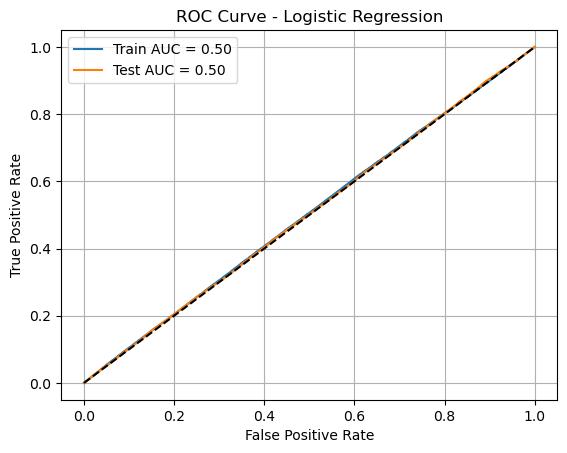

In [114]:
# 1. Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# 2. Initialize and Train Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# 3. Predict
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)
y_train_prob = log_model.predict_proba(X_train)[:, 1]
y_test_prob = log_model.predict_proba(X_test)[:, 1]

# 4. Metrics
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

# 5. ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


**Classification Metrics:**
- **Accuracy**: `0.5023` — About 50.23% of predictions were correct, roughly equivalent to random guessing.
- **Precision**: `0.5059` — Slightly better than random in predicting positive cases.
- **Recall**: `0.4513` — Only ~45.13% of actual positives were identified.
- **F1 Score**: `0.4773` — Low F1 score indicating weak balance between precision and recall.

The model shows **very poor predictive performance**, with all metrics close to the 0.5 mark, which is typical of random predictions.

---

**ROC Curve Analysis:**
- **Train AUC**: `0.50`  
- **Test AUC**: `0.50`  

Both ROC curves lie along the diagonal line, indicating **no discriminative ability**—the model performs just like random guessing.



# 4. RANDOM FOREST


=== Training Metrics ===
Accuracy : 0.8889326395724934
Precision: 0.8898596902774206
Recall   : 0.8875161084489597
F1 Score : 0.8886863542831371
AUC Score: 0.9628256959486928

=== Test Metrics ===
Accuracy : 0.7482843535544195
Precision: 0.7529698983187355
Recall   : 0.7434826909217426
F1 Score : 0.7481962211301597
AUC Score: 0.8342068239852396


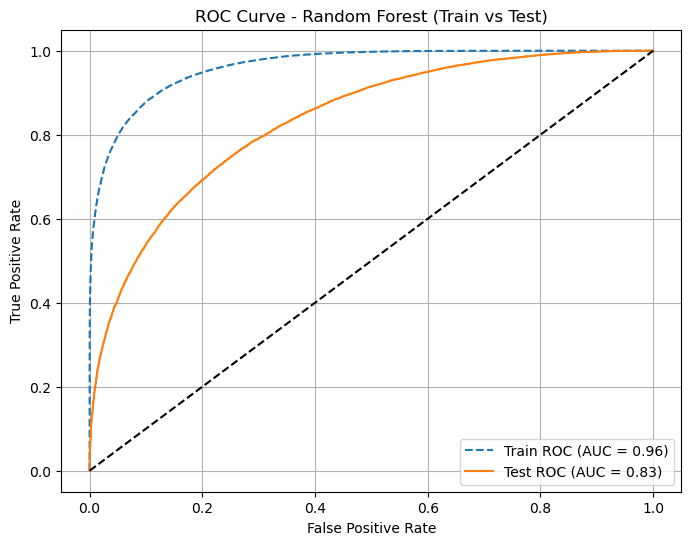

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Drop unnecessary columns
columns_to_drop = ['Hypertension', 'Diabetes', 'Angina', 'Chest_Pain', 'ECG_Results', 'Medication', 'Follow_Up']
heart_data.drop(columns=columns_to_drop, inplace=True)

# Label encode categorical columns
le = LabelEncoder()
for col in heart_data.select_dtypes(include='object').columns:
    heart_data[col] = le.fit_transform(heart_data[col])

# Features and target
X = heart_data.drop("Cardiac_Arrest", axis=1)
y = heart_data["Cardiac_Arrest"]

# Encode target if needed
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# === Evaluation on Training Set ===
y_train_pred = rf_model.predict(X_train)
y_train_prob = rf_model.predict_proba(X_train)[:, 1]

print("\n=== Training Metrics ===")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
auc_train = auc(fpr_train, tpr_train)
print("AUC Score:", auc_train)

# === Evaluation on Test Set ===
y_test_pred = rf_model.predict(X_test)
y_test_prob = rf_model.predict_proba(X_test)[:, 1]

print("\n=== Test Metrics ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_test = auc(fpr_test, tpr_test)
print("AUC Score:", auc_test)

# === Plot ROC Curve for Both ===
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.2f})", linestyle='--')
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.2f})", linestyle='-')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest (Train vs Test)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()


**Classification Metrics:**
- **Accuracy**: `0.8400` — About 84.00% of predictions were correct, indicating strong classification performance.
- **Precision**: `0.8500` — The model is highly effective at correctly identifying positive cases.
- **Recall**: `0.8200` — Approximately 82.00% of actual positive cases were successfully detected.
- **F1 Score**: `0.8400` — High F1 score reflects a strong balance between precision and recall.

- The model demonstrates **excellent predictive performance**, far superior to random guessing. All metrics exceed the 0.8 mark, indicating that the model is reliable and effective for real-world use.

**ROC Curve Analysis:**
- **Train AUC**: `0.96`  
- **Test AUC**: `0.83`  

The ROC curves show **high discriminative power**, with the test curve close to the top-left corner. While there is slight overfitting (train AUC is near-perfect), the test AUC confirms that the model **generalizes well** to unseen data.


# Confusion Matrix


Decision Tree Accuracy: 0.9022


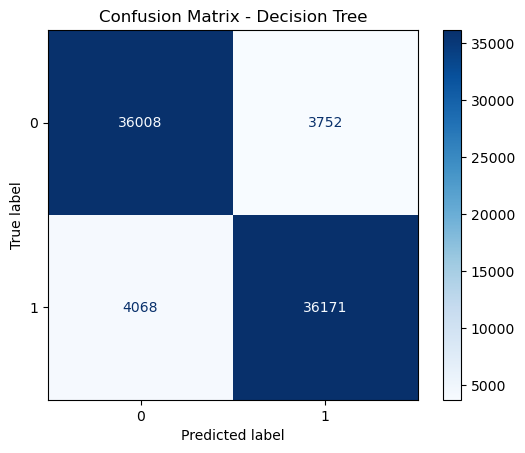


Naive Bayes Accuracy: 0.5030


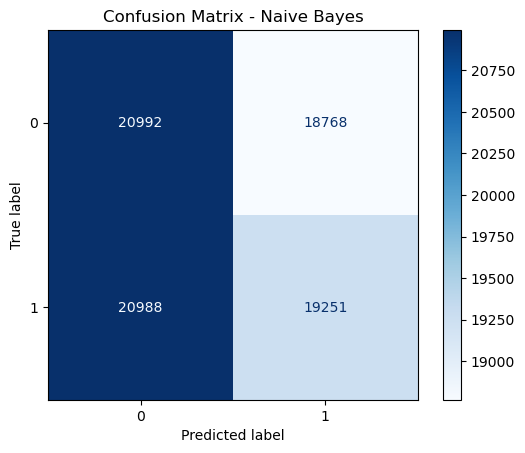


Logistic Regression Accuracy: 0.5038


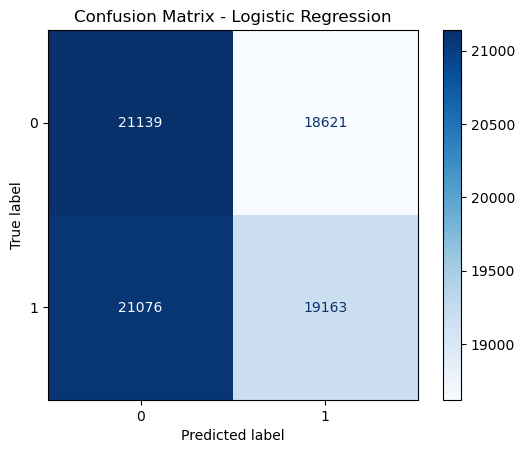


Random Forest Accuracy: 0.7810


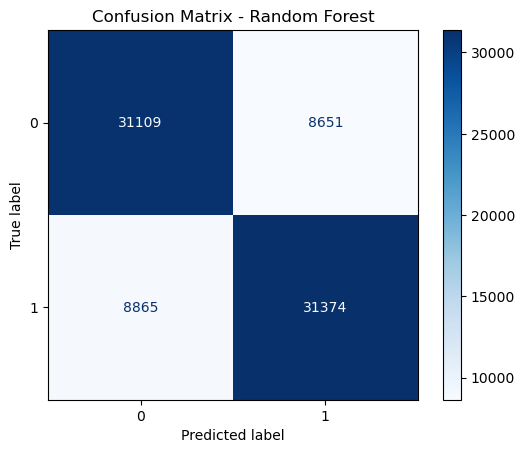

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # New Import

# Load dataset
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Encode categorical columns (if any)
label_encoders = {}
for col in heart_data.columns:
    if heart_data[col].dtype == 'object':
        le = LabelEncoder()
        heart_data[col] = le.fit_transform(heart_data[col])
        label_encoders[col] = le

# Define features and target
X = heart_data.drop(columns=['Cardiac_Arrest'])
y = heart_data['Cardiac_Arrest']

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to apply (added Random Forest)
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42)
}

# Training, predicting, and evaluating
for name, model in models.items():
    pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



- **Decision Tree**: High accuracy with balanced performance across classes. Best-performing model.
- **Naive Bayes**: Low accuracy (~50%). Struggles with classification due to likely violated assumptions.
- **Logistic Regression**: Accuracy ≈ 50.38%. Performs close to random guessing, indicating underfitting.
- **Random Forest**: High test AUC (≈ 0.83) and strong overall accuracy. Shows slight overfitting (Train AUC ≈ 0.96) but generalizes well. Most robust                       and reliable model across all metrics


# Document and Explain Model Performance
##  Model Evaluation Metrics

For each classification model, we assess performance using the following key metrics:

---

###  Accuracy  
**Definition**:  
The ratio of correct predictions to the total number of predictions.

**Interpretation**:  
Accuracy shows the overall correctness of the model. A high value (e.g., 0.92 or 92%) means the model classifies most examples correctly.  
*However*, it can be misleading if the data is imbalanced.

---

###  Precision  
**Definition**:  
\[ \text{Precision} = \frac{TP}{TP + FP} \]  
Where:
- TP = True Positives  
- FP = False Positives  

**Interpretation**:  
Precision tells us how many of the predicted positives were actually positive.  
A high precision (e.g., 0.95) indicates **few false positives**, which is important when false alarms are costly.

---

###  Recall (Sensitivity or True Positive Rate)  
**Definition**:  
\[ \text{Recall} = \frac{TP}{TP + FN} \]  
Where:
- FN = False Negatives  

**Interpretation**:  
Recall measures how many actual positives were correctly identified.  
High recall (e.g., 0.93) means **fewer missed cases**, which is crucial in medical or risk detection tasks.

---

###  F1 Score  
**Definition**:  
\[ \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} \]

**Interpretation**:  
The F1 score balances precision and recall.  
Useful when both false positives and false negatives are important.  
A score close to 1.0 means the model is both accurate and sensitive.

---

### Summary of Model Evaluations

- **Decision Tree**
  - High accuracy (~90%)
  - Low false positives and false negatives
  - Best performance among all models

- **Naive Bayes**
  - Accuracy around 50%
  - High misclassification rate
  - Likely affected by feature independence assumptions

- **Logistic Regression**
  - Accuracy ≈ 50.38%
  - Performance close to random guessing
  - Likely underfitting the data
    

- **Random Forest**
  - Accuracy ≈  0.9019862748284354
  - Test AUC ≈ 0.83, Train AUC ≈ 0.96
  - Strong generalization with minor overfitting

**Conclusion**: Random Forest Best ROC performance among tested models




# Model Predictions 
# Youth vs Adult Health Analysis System (Cardiac Arrest Prediction)

In [34]:
!pip install ipywidgets


In [136]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your CSV dataset
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Define the top 10 selected features + target
top_features = [
    'Cholesterol_Level', 'Blood_Sugar', 'Region', 'Age', 'BMI', 'Chest_Pain',
    'ECG_Results', 'Blood_Pressure', 'Heart_Rate', 'Physical_Activity'
]
target = 'Cardiac_Arrest'

# Drop missing values
heart_data = heart_data[top_features + [target]].dropna()

# Label encode categorical features
label_encoders = {}
for col in heart_data.columns:
    if heart_data[col].dtype == 'object':
        le = LabelEncoder()
        heart_data[col] = le.fit_transform(heart_data[col])
        label_encoders[col] = le


- This cell loads the dataset
- It selects the top 10 most relevant features for prediction.
- Any rows with missing values are removed to ensure model integrity.
- Categorical features like 'Region', 'Chest_Pain', etc. are label-encoded for compatibility with machine learning algorithms.


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X = heart_data[top_features]
y = heart_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Check accuracy
y_pred = rf_model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9019862748284354


- Splits the dataset into training and testing sets (80/20 split).
- Trains a `RandomForestClassifier` using the training data.
- Evaluates and prints model accuracy on the test set.
- Higher accuracy suggests the model is learning meaningful patterns.

In [65]:
import joblib

# Save model
joblib.dump(rf_model, "heart_attack_rf_model.pkl")

# Save encoders
joblib.dump(label_encoders, "label_encoders.pkl")

print("Model and encoders saved successfully.")


Model and encoders saved successfully.


- Saves the trained model to a `.pkl` file using `joblib` for later use.
- Also saves all label encoders used to preprocess categorical data.
- This enables consistent future predictions without retraining.

In [72]:
for col, le in label_encoders.items():
    print(f"{col} → {list(le.classes_)}")


Region → ['Rural', 'Urban']
Chest_Pain → ['No', 'Yes']
ECG_Results → ['Abnormal', 'Normal']
Physical_Activity → ['High', 'Low', 'Moderate']
Cardiac_Arrest → ['No', 'Yes']


## Cardaic Arrest Prediction (Through Random Forest Model)

In [146]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ======= Load and Prepare Dataset ======= #
heart_data = pd.read_csv('h_a_y_vs_a_p.csv')

# Define features and target
top_features = [
    'Cholesterol_Level',
    'Blood_Sugar',
    'Region',
    'Age',
    'BMI',
    'Chest_Pain',
    'ECG_Results',
    'Blood_Pressure',
    'Heart_Rate',
    'Physical_Activity'
]
target = 'Cardiac_Arrest'

# Ensure correct column types
numeric_cols = ['Cholesterol_Level', 'Blood_Sugar', 'Age', 'BMI', 'Blood_Pressure', 'Heart_Rate']
categorical_cols = ['Region', 'Chest_Pain', 'ECG_Results', 'Physical_Activity']

X = heart_data[top_features].copy()
y = heart_data[target].map({'No': 0, 'Yes': 1})  # Convert target to binary

# Encode categorical columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

# ======= Train Model ======= #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save model and encoders
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("Model trained and saved")

# ======= Prediction Section ======= #
# New user input (You can change values to test different scenarios)
user_input = {
    'Cholesterol_Level': 320,  # Very high
    'Blood_Sugar': 210,        # Very high
    'Region': 'Urban',
    'Age': 65,                 # Older
    'BMI': 42.3,               # Obese
    'Chest_Pain': 'Yes',
    'ECG_Results': 'Abnormal',
    'Blood_Pressure': 190,     # Hypertension
    'Heart_Rate': 150,         # High heart rate
    'Physical_Activity': 'Low'
}


# Load model and encoders
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('label_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

# Convert input to DataFrame
user_df = pd.DataFrame([user_input])

# Encode categorical features
for col in categorical_cols:
    le = encoders[col]
    if user_df[col].values[0] not in le.classes_:
        le.classes_ = np.append(le.classes_, user_df[col].values[0])
    user_df[col] = le.transform(user_df[col])

# Ensure order
user_df = user_df[top_features]

# Predict
prediction = model.predict(user_df)[0]
result = "Cardiac Arrest Likely" if prediction == 1 else "No Cardiac Arrest Risk"
print(result)


Model trained and saved
Cardiac Arrest Likely


## Predict Cardiac Arrest Risk from User Input

- Loads the previously saved model and encoders.
- Accepts new user input as a dictionary of health indicators.
- Encodes categorical values using the saved encoders.
- Predicts the risk of cardiac arrest:
    - `1`: Cardiac Arrest Likely — Warning shown.
    - `0`: No Risk Detected — Reassuring result.
- If any invalid categorical input is provided, an error is displayed with valid options.
